In [123]:
!pip install --user networkx pyvis

  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)


In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'upper'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
EB = [ ] 
EE1  = [ ]
EE2 = [ ] 

In [3]:
EB = [ ] 
EE1  = [ ]
EE2 = [ ] 

In [6]:
with open("graph_debug.txt", "r") as f: 
    lines = f.readlines()
    points = [ ]
    links = []
    final_links = [ ]
    for i,l in enumerate(lines):
        if i % 3 == 0:
            points  = eval(l)
        elif i % 3 == 1:
            links = eval(l)
        elif i % 3 ==2:
            final_links = eval(l)
            
            if points[0][3] == 0:
                EB.append((points, links, final_links))
            if points[0][3] == 1:
                EE1.append((points, links, final_links))
            if points[0][3] == -1:
                EE2.append((points, links, final_links))
            points = [ ]
            links = [ ]
            final_links = [ ]
      

In [7]:
import networkx as nx

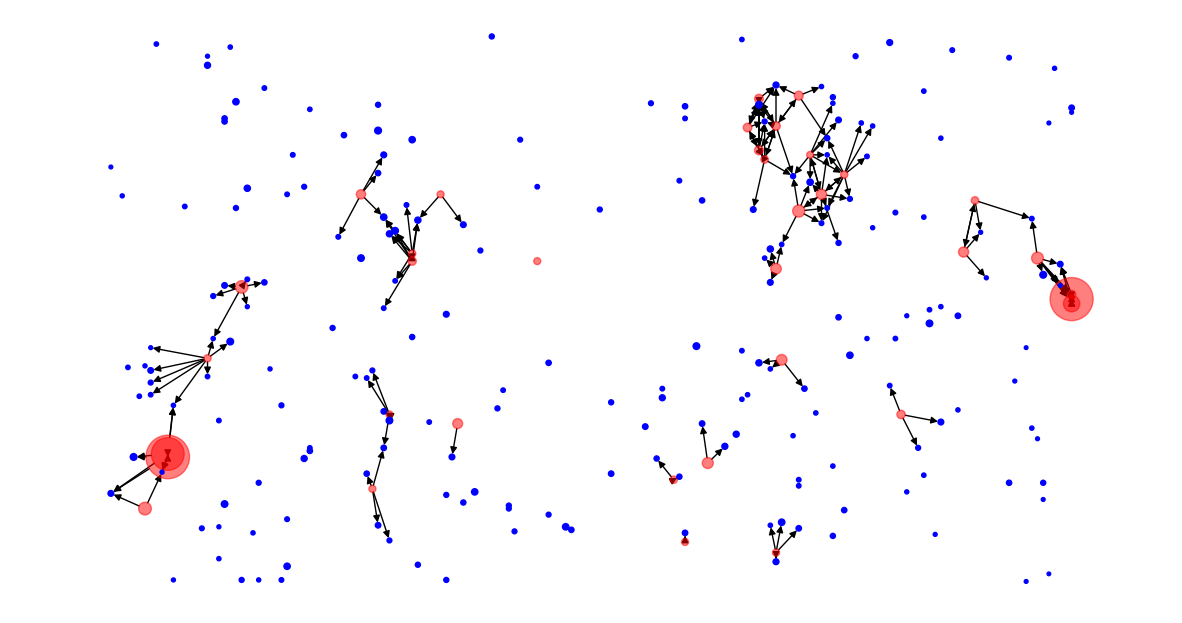

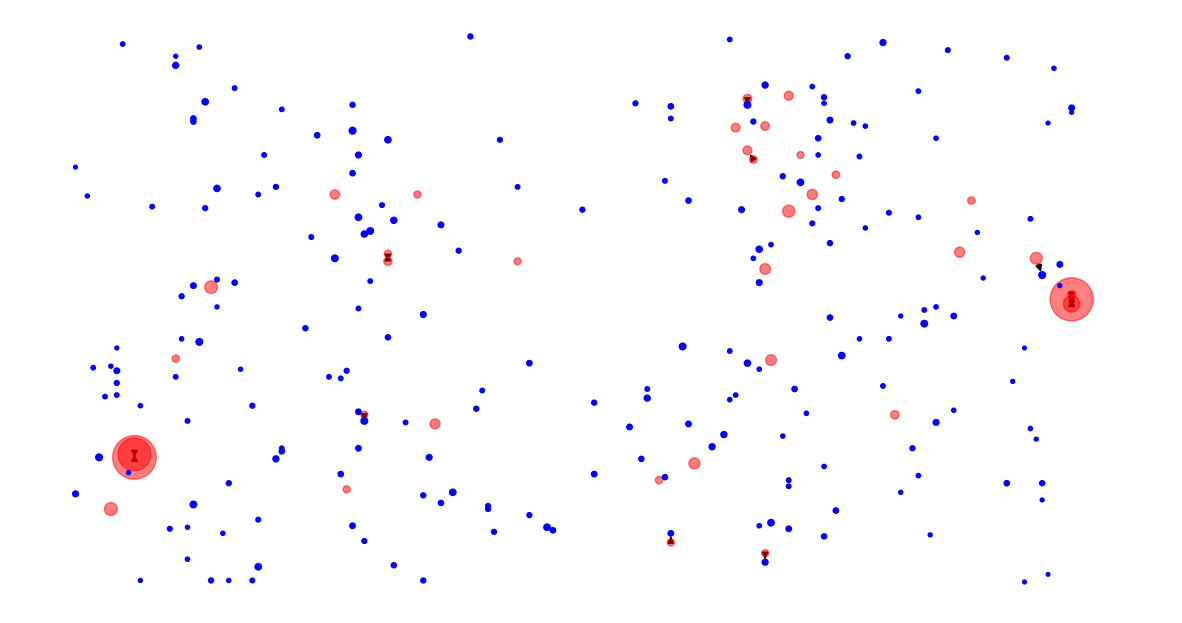

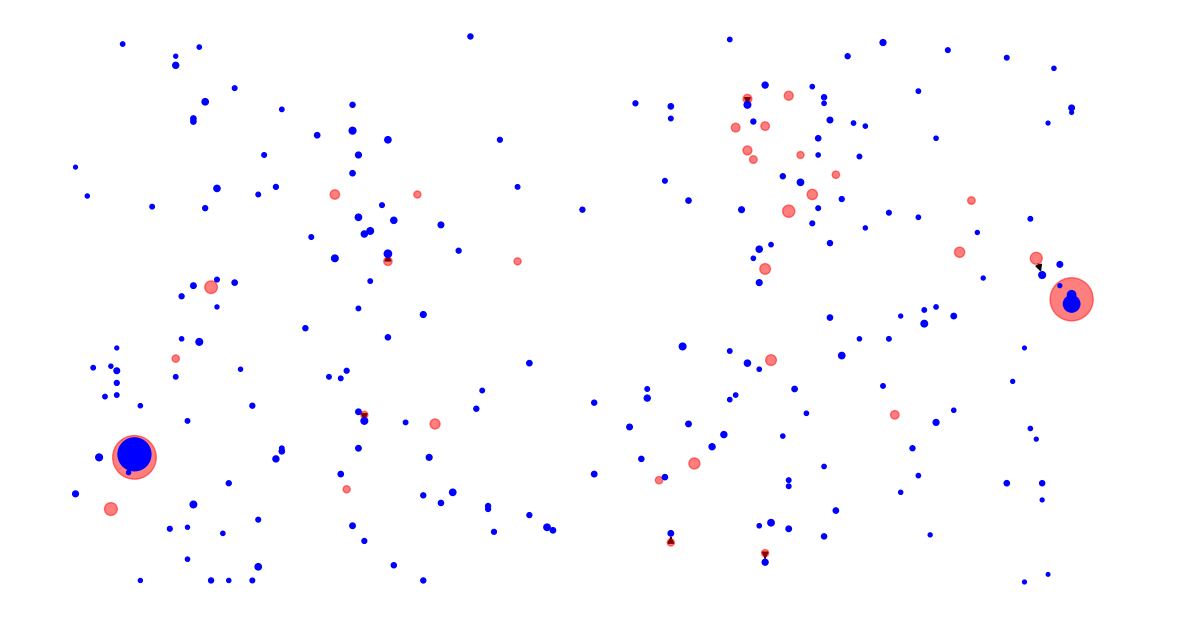

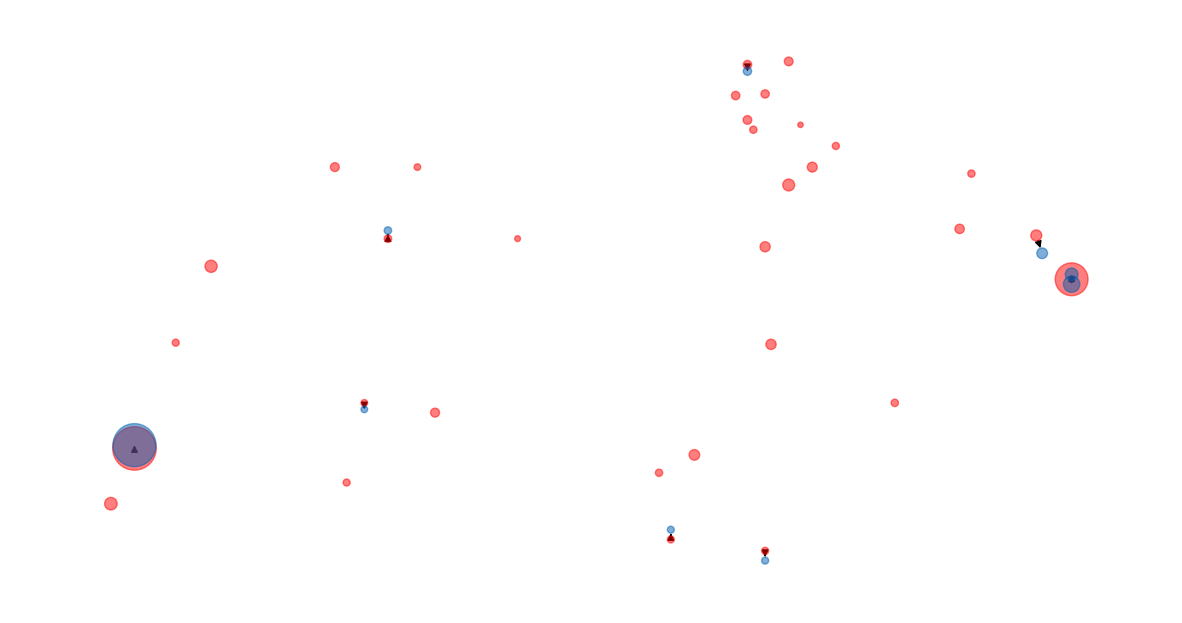

In [18]:
N=7
G=nx.DiGraph()
Gb=nx.DiGraph()
Gf = nx.DiGraph()
Gg = nx.DiGraph()

energies = [ ]
nodes = {}
for (i, ix,iy,iz, en) in EB[N][0]:
    G.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
    Gb.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
    Gf.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
    nodes[i] = (ix,iy)
    energies.append(en)

seeds = [ ] 

for (i, j, s) in EB[N][1]:
    G.add_edge(i,j, score=s)
    if (s>0.5):
        Gb.add_edge(i,j, score=s)
    if i==j:
        seeds.append(i)

final_seed = []
for (i, j) in EB[N][2]:
    Gf.add_edge(i,j)
    final_seed.append(i)
    
nodes_final = [ ]
final_seeds_2 = [ ]
final_energies = [ ]
for (i, j) in EB[N][2]:
    Gg.add_node(i, pos=nodes[i])
    Gg.add_node(j, pos=nodes[j])
    Gg.add_edge(i,j)
    final_seeds_2.append(i)
    if i not in nodes_final:
        nodes_final.append(i)
    if j not in nodes_final:
        nodes_final.append(j)
    
for i in set(nodes_final):
    final_energies.append(EB[N][0][i][4])

pos = nx.get_node_attributes(G,'pos')
is_seed = [ i in seeds for i in range(len(EB[N][0]))]
is_seed_final = [ i in final_seed for i in range(len(EB[N][0]))]
is_seed_final_2 = [ i in final_seeds_2 for i in nodes_final]

node_size = [ en*30  for en in energies]
node_size_final = [en*30 for en in final_energies]

f= plt.figure(figsize=(15,8), dpi=100)
nx.draw(G,pos, ax=plt.gca(), node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
f= plt.figure(figsize=(15,8), dpi=100)
nx.draw(Gb,pos, ax=plt.gca(), node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
f = plt.figure(figsize=(15,8), dpi=100)
nx.draw(Gf,pos, ax=plt.gca(), node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed_final])
f = plt.figure(figsize=(15,8), dpi=100)
nx.draw(Gg,nx.get_node_attributes(Gg,'pos'), ax=plt.gca(), node_size=node_size_final, node_color = [  "#ff000080" if i else "#005FB280" for i in is_seed_final_2])

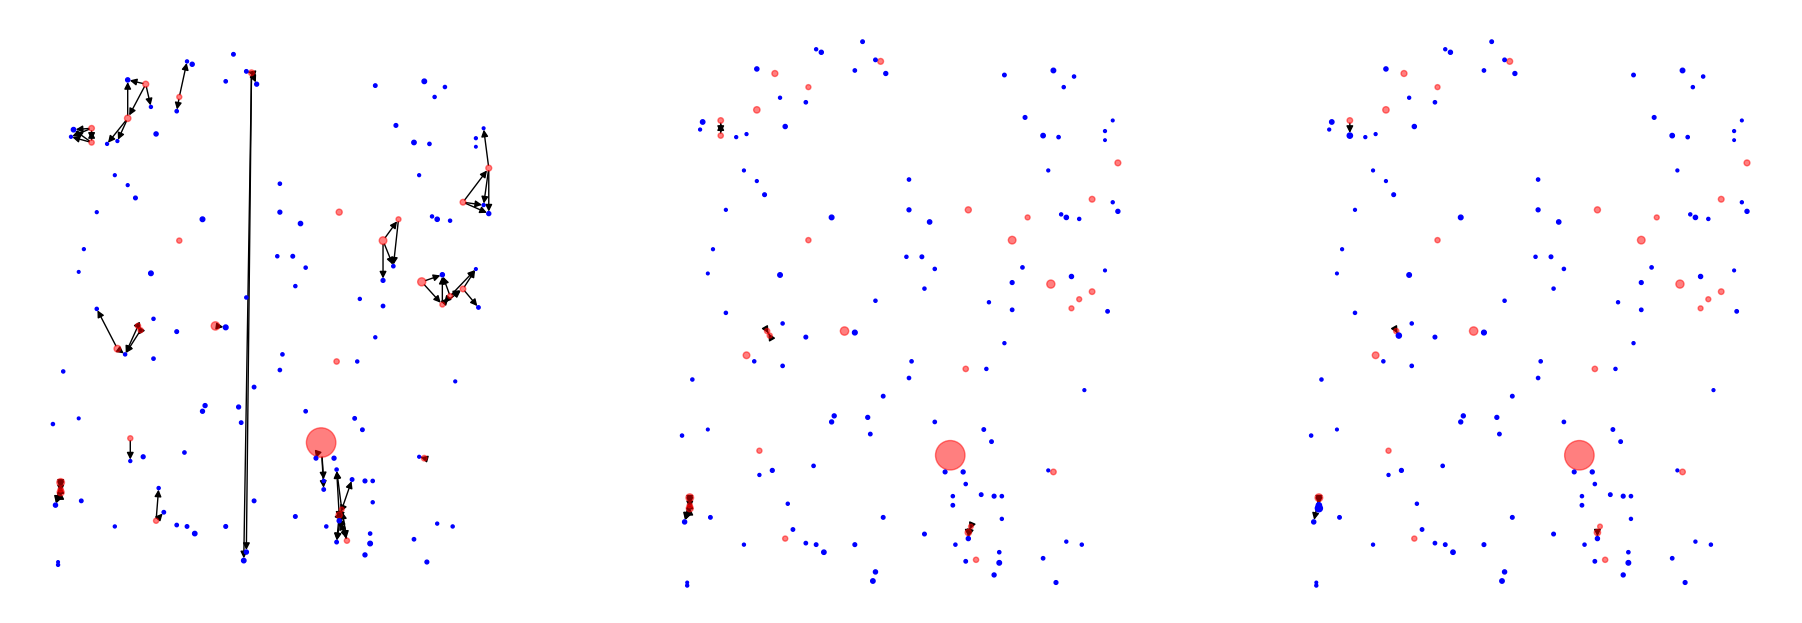

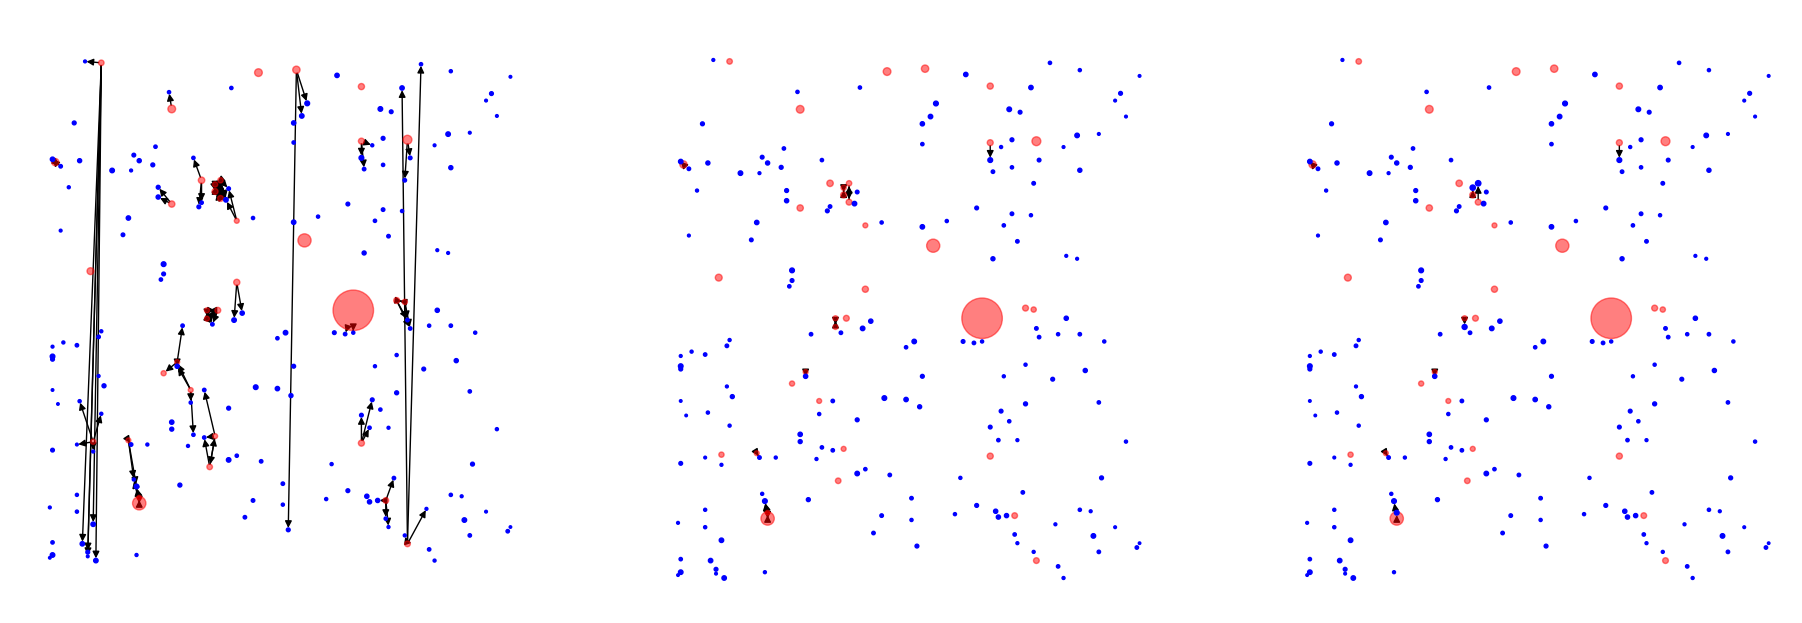

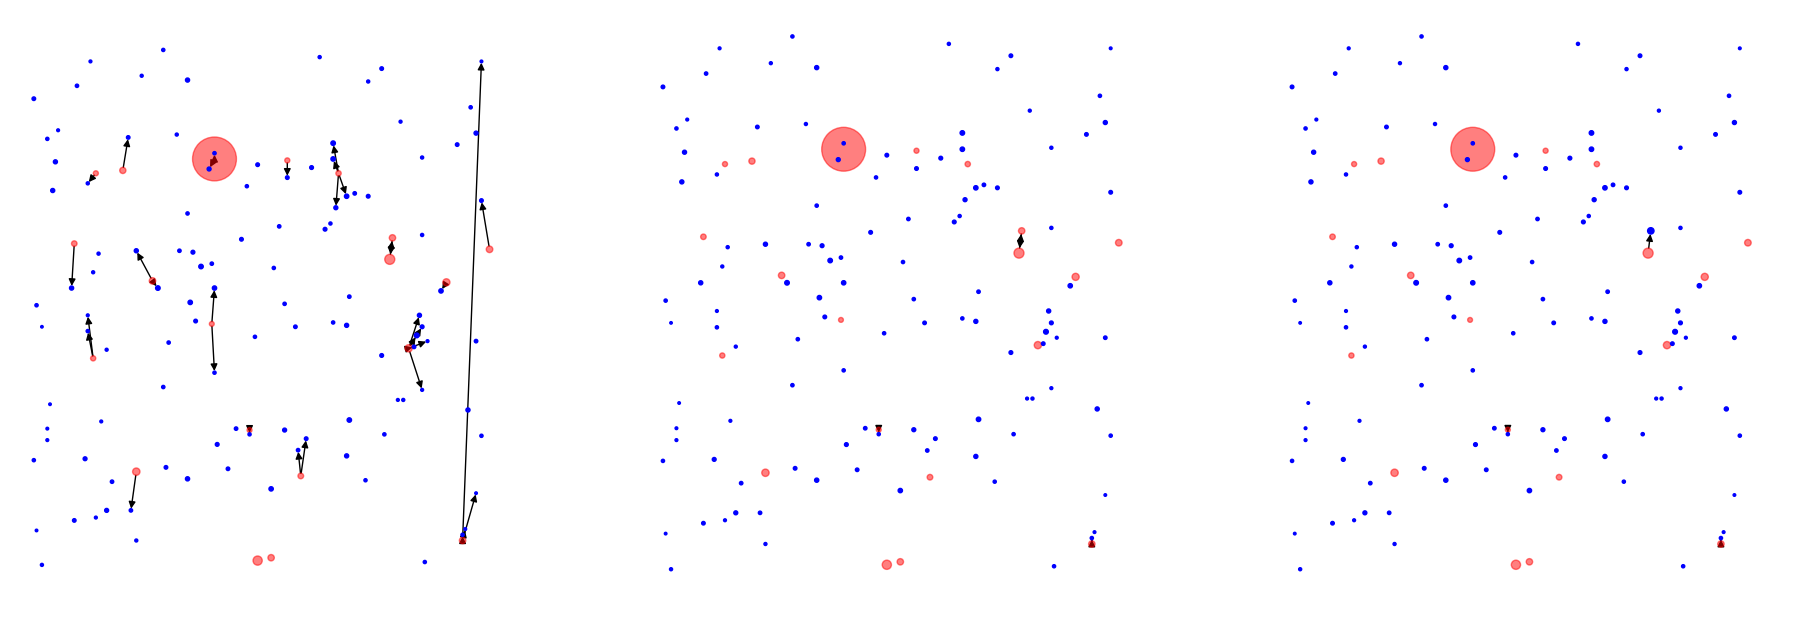

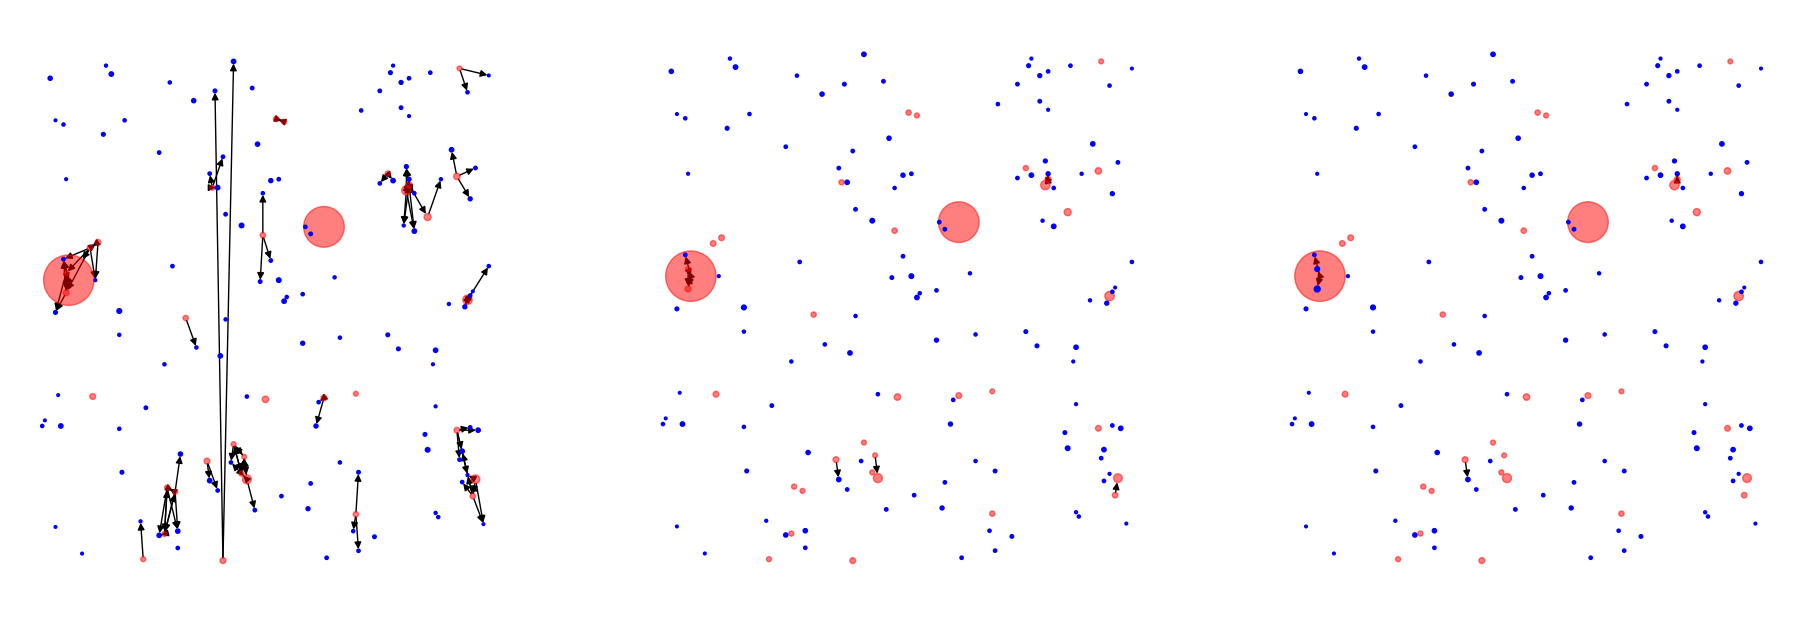

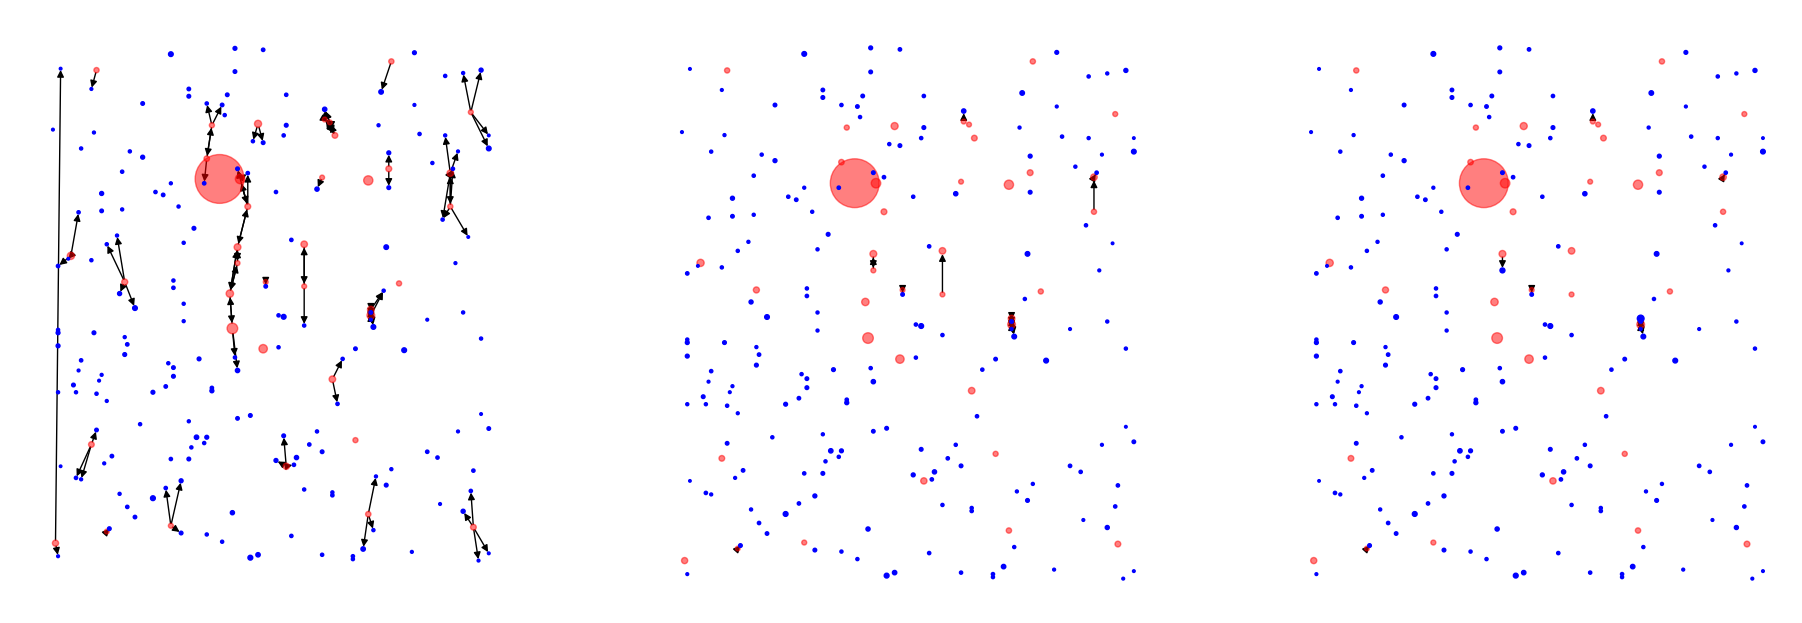

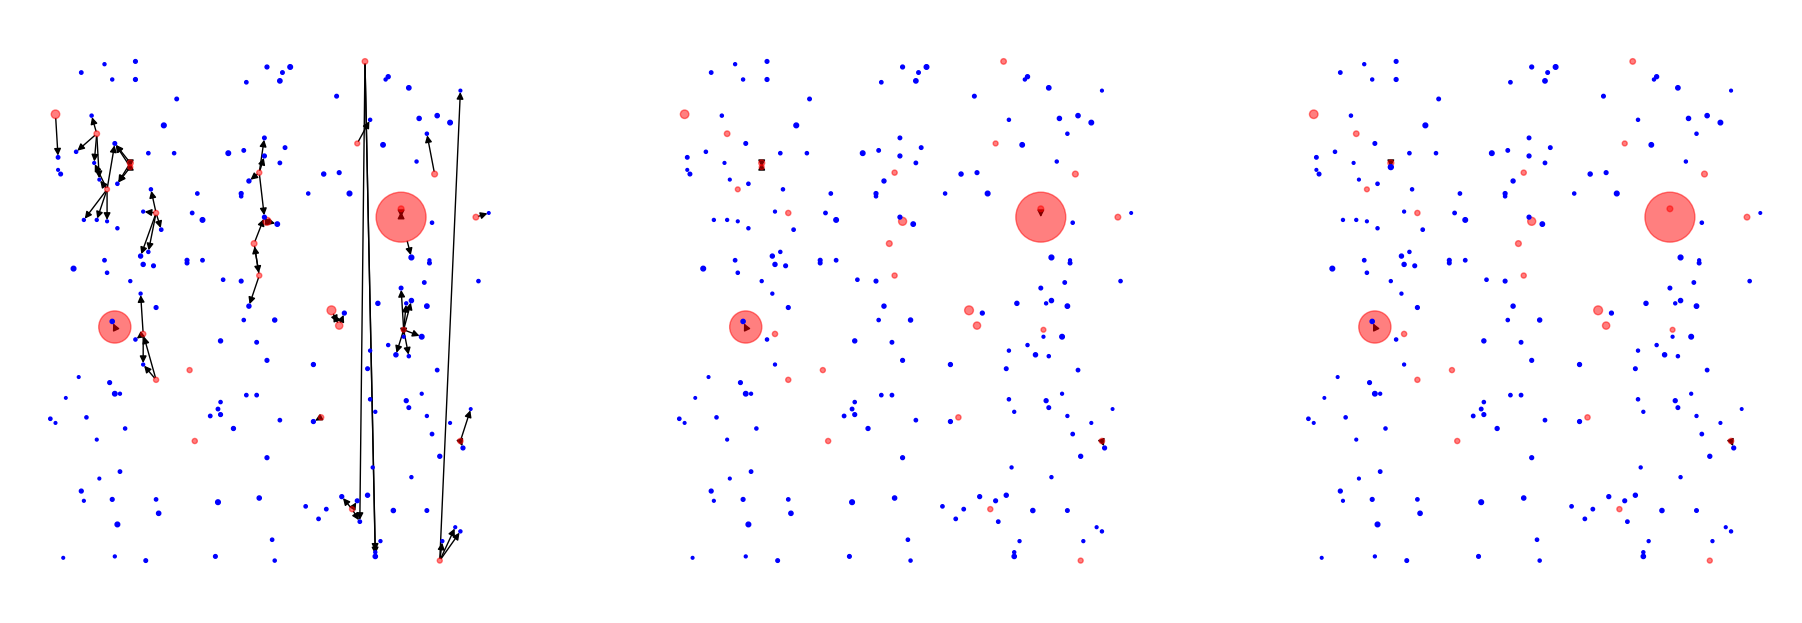

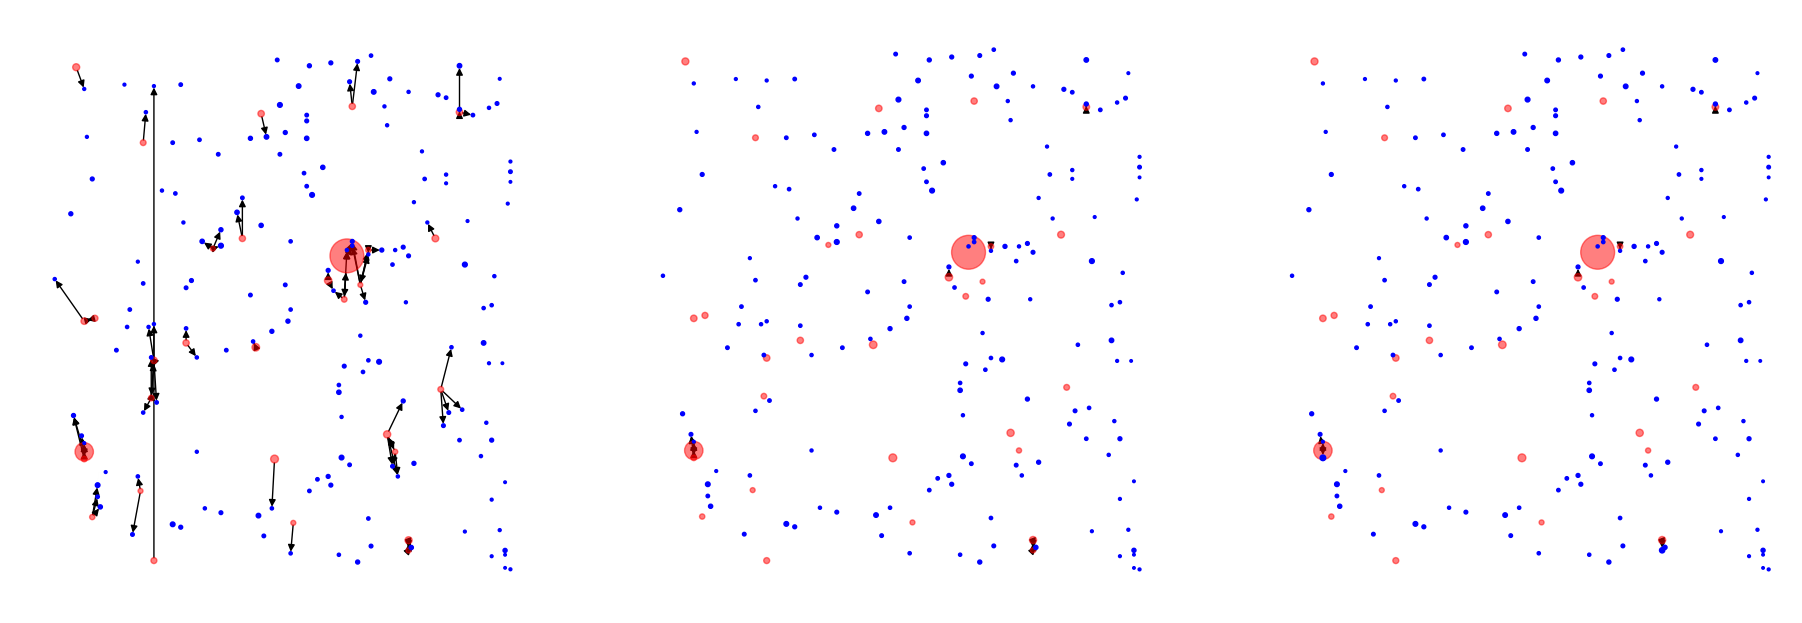

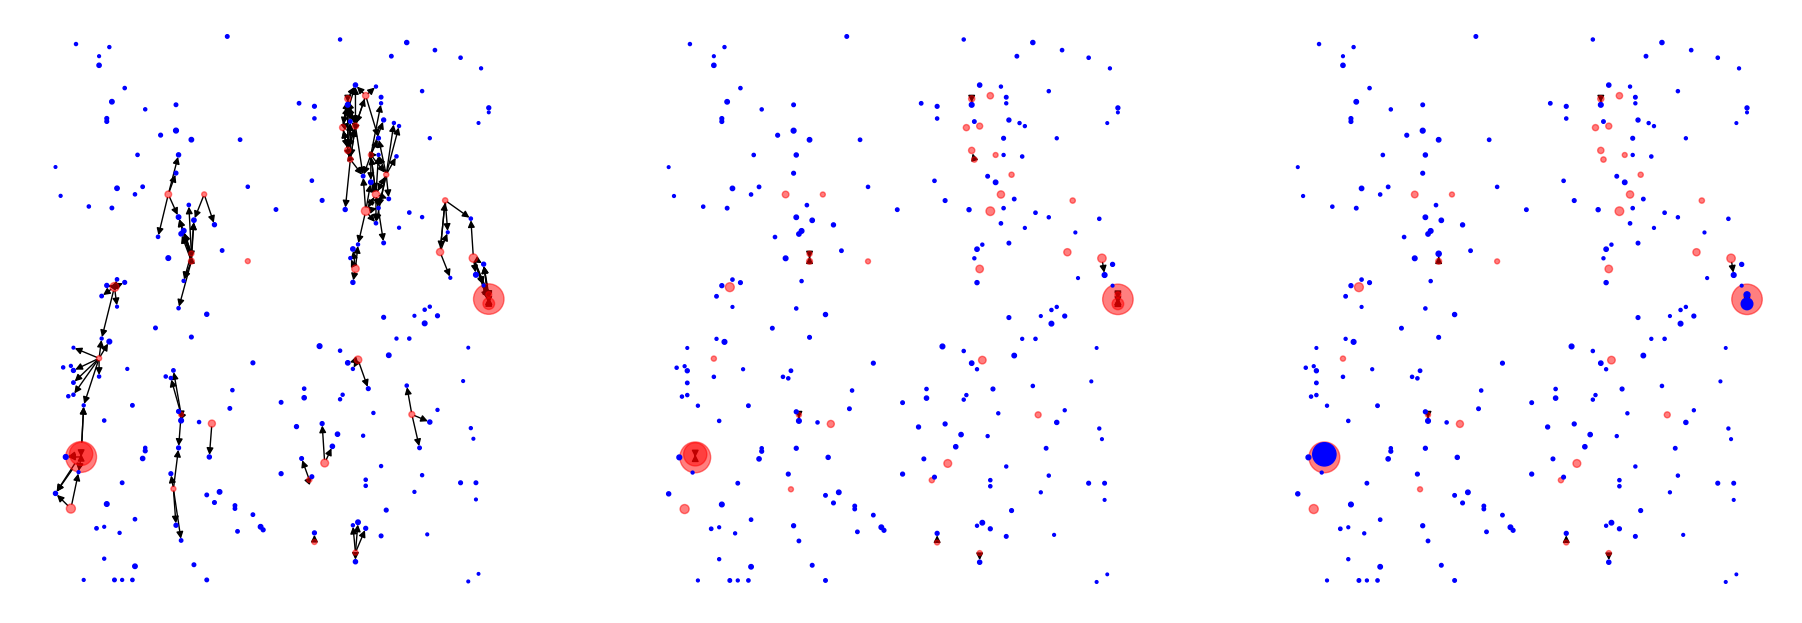

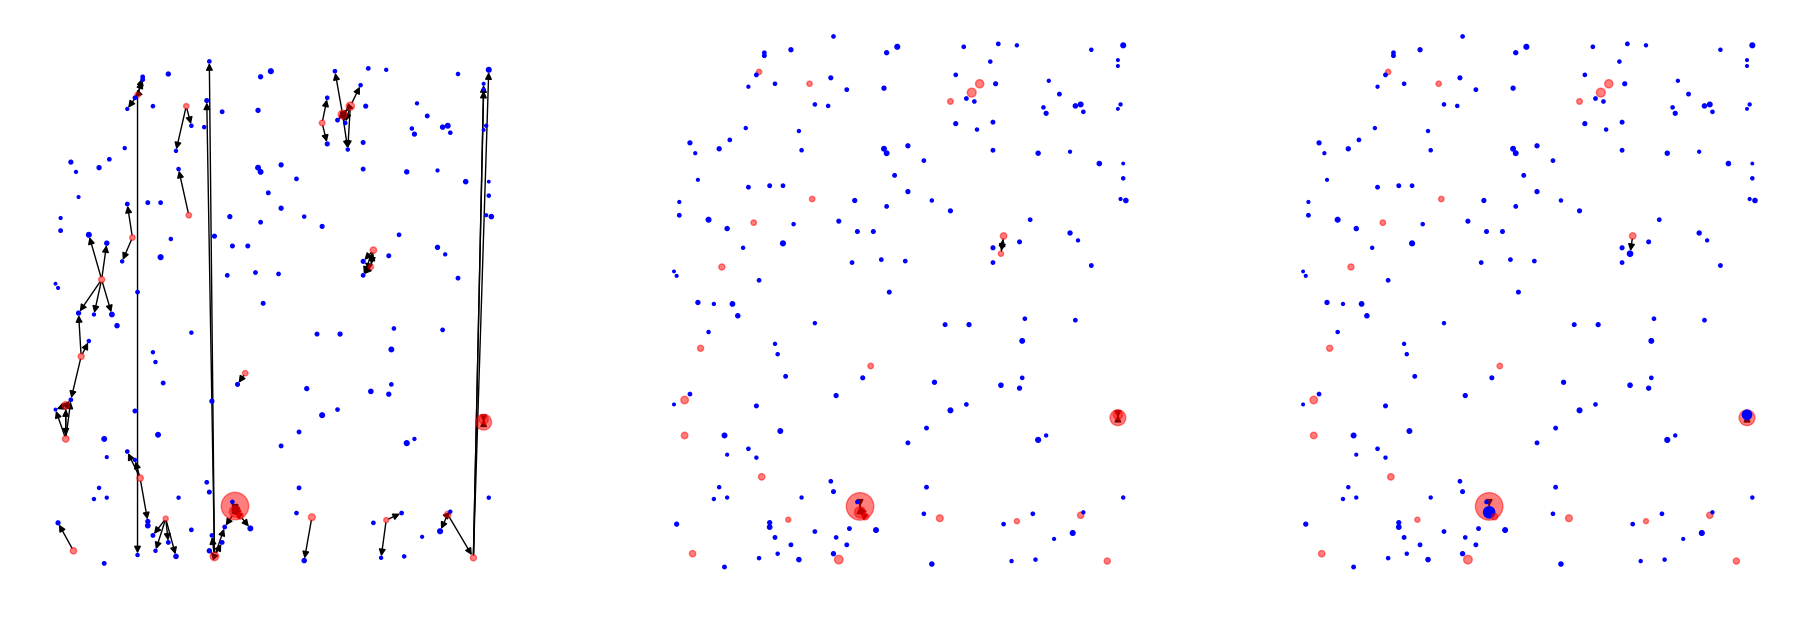

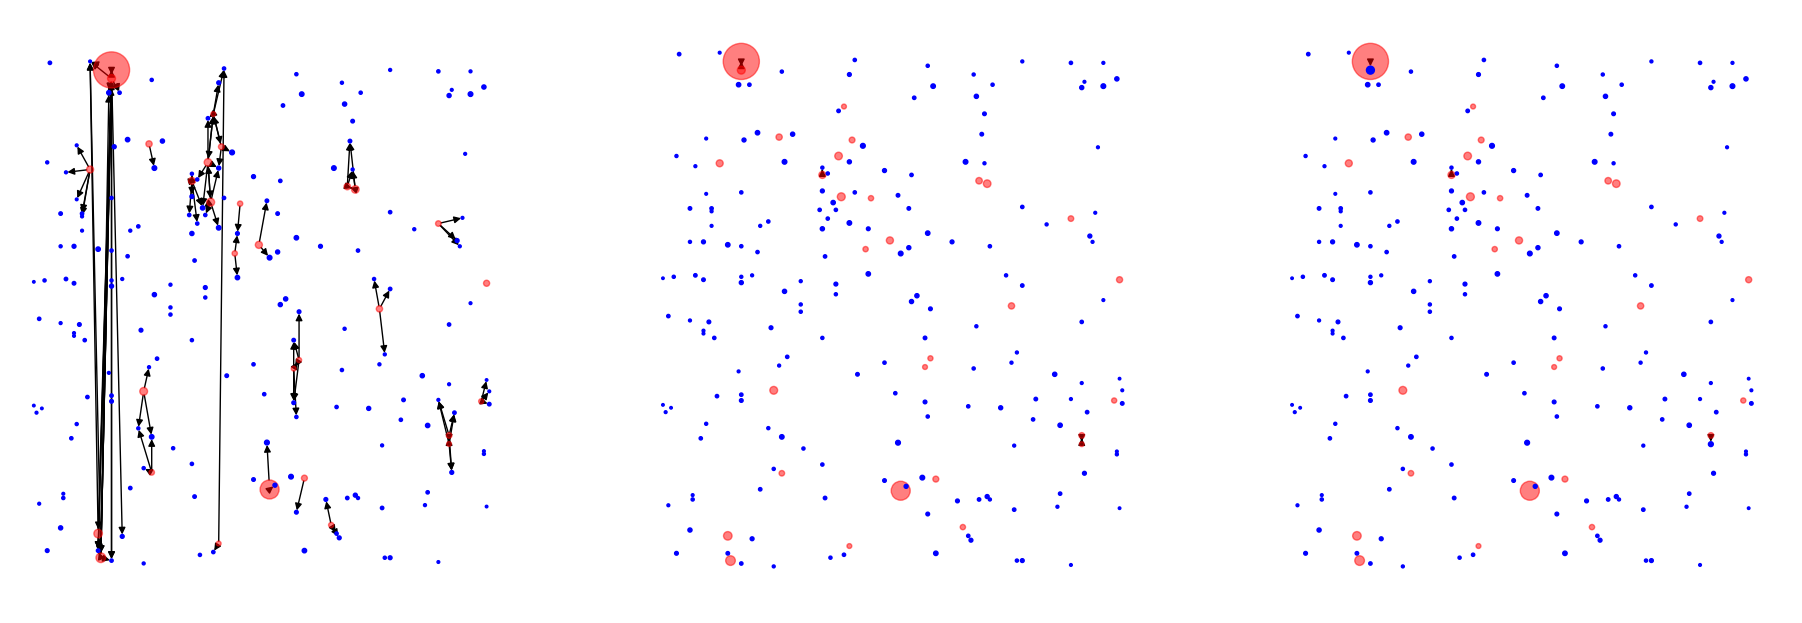

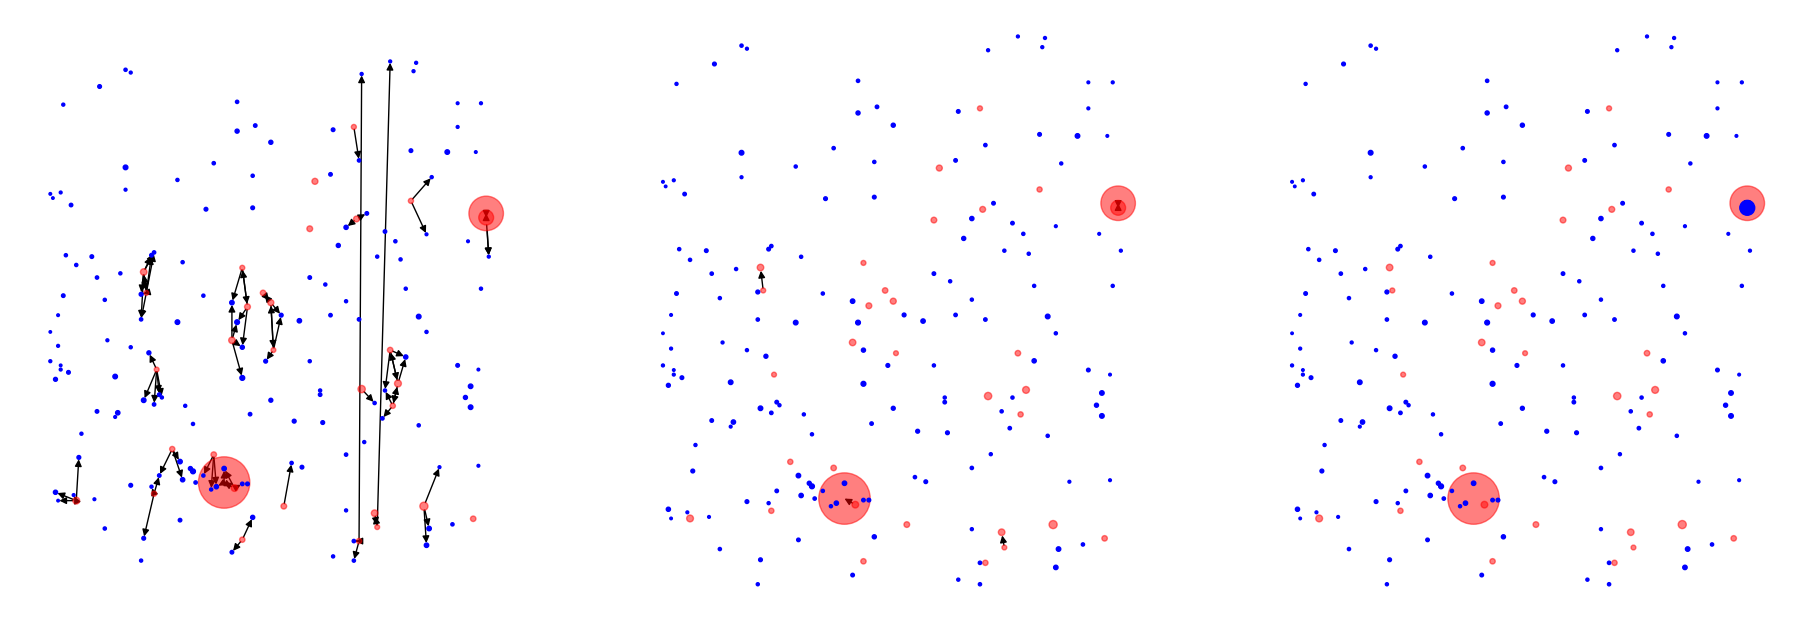

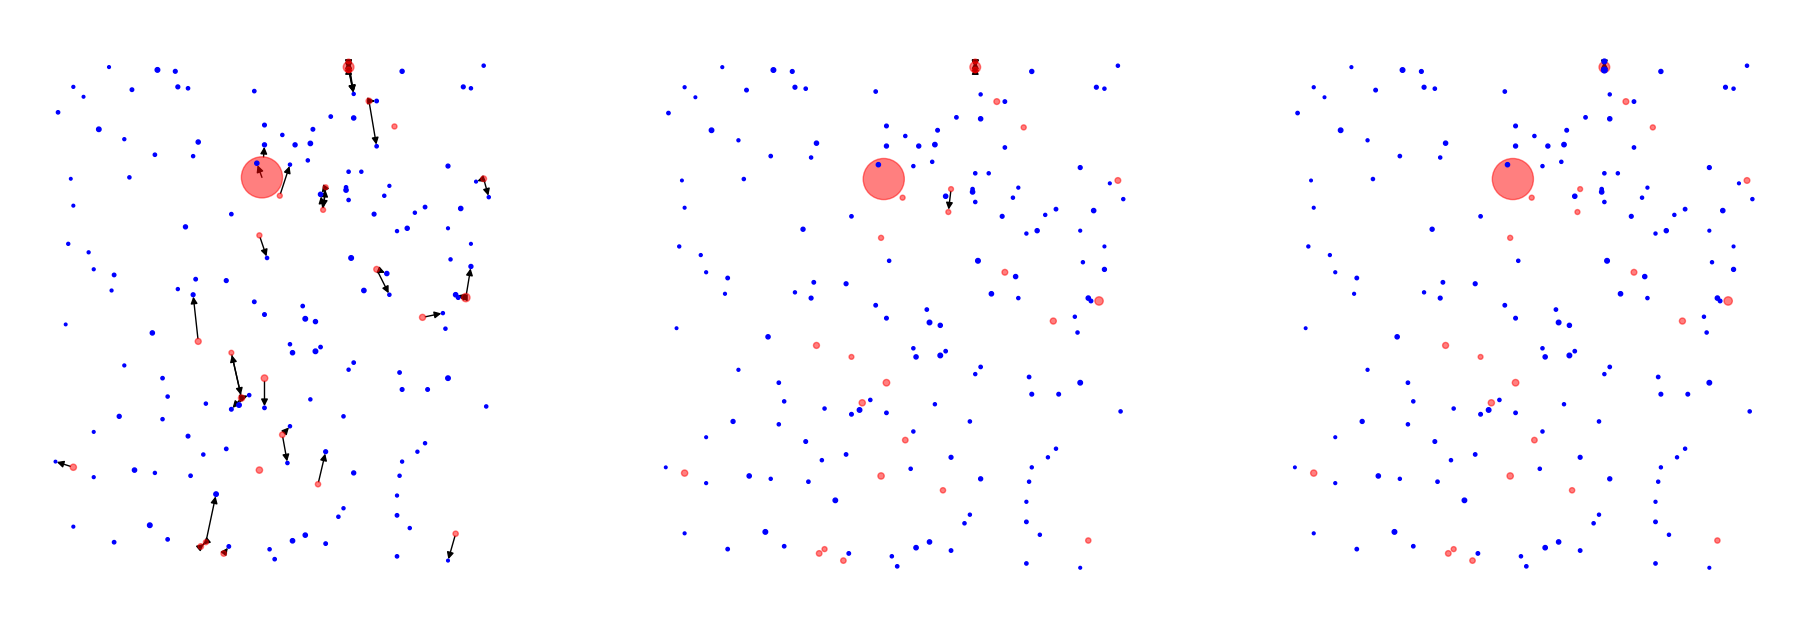

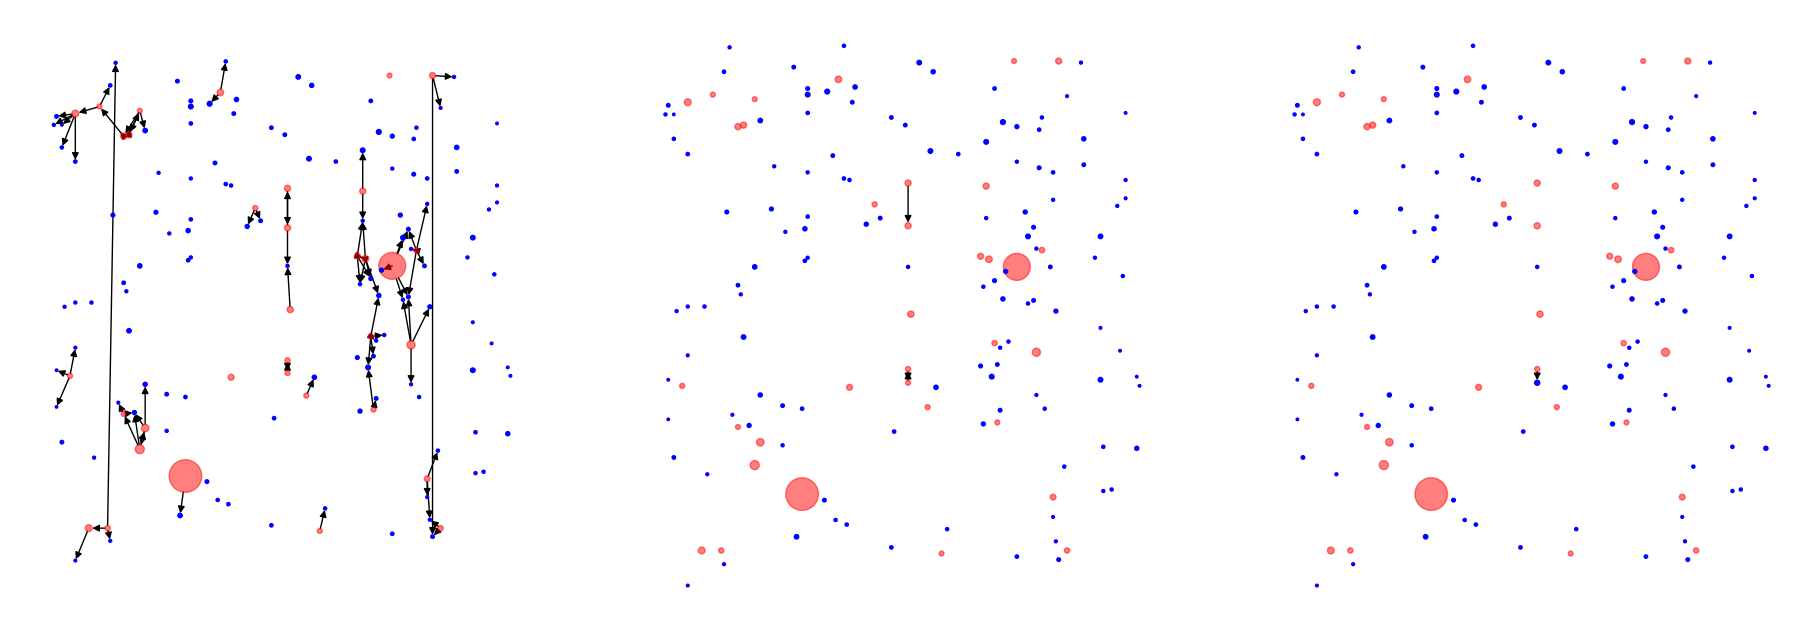

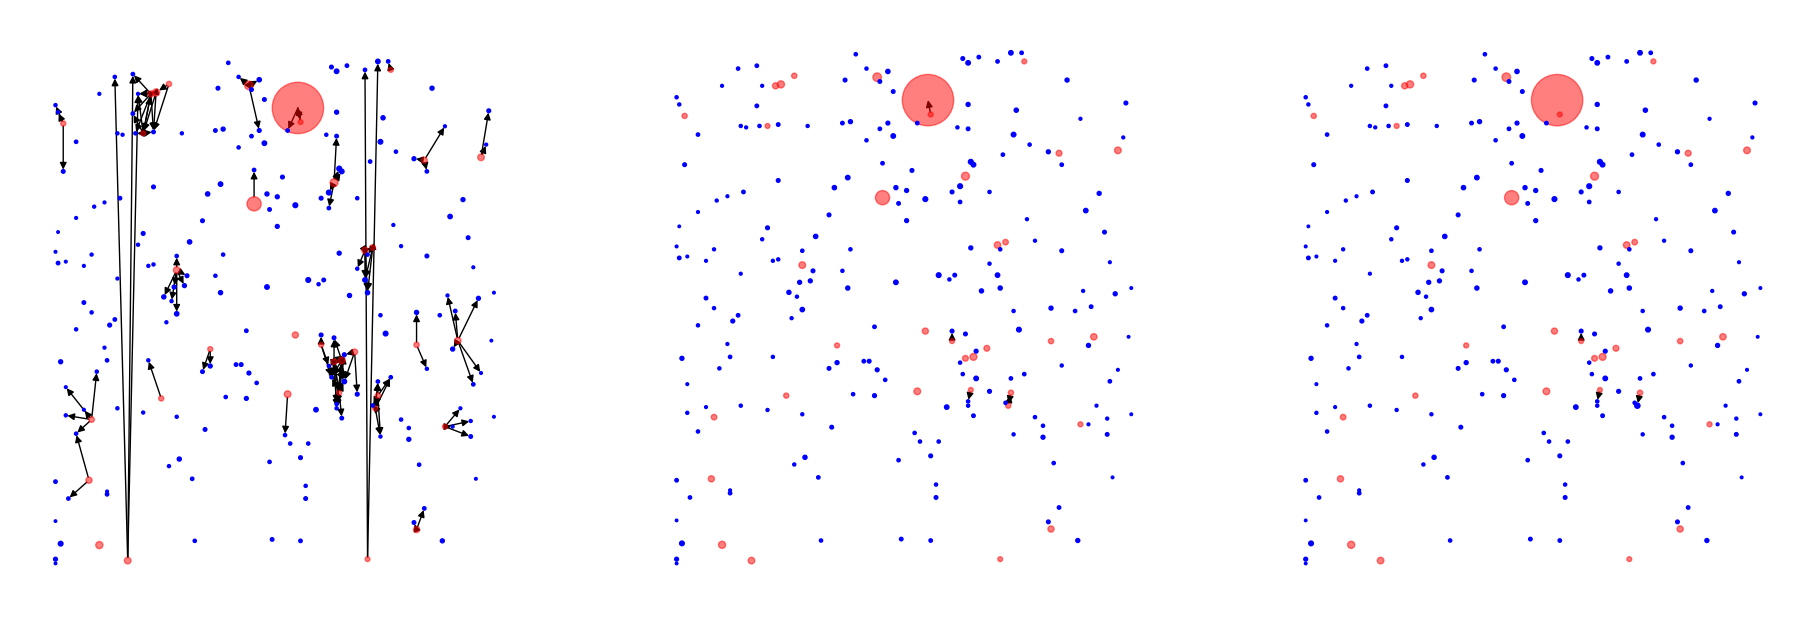

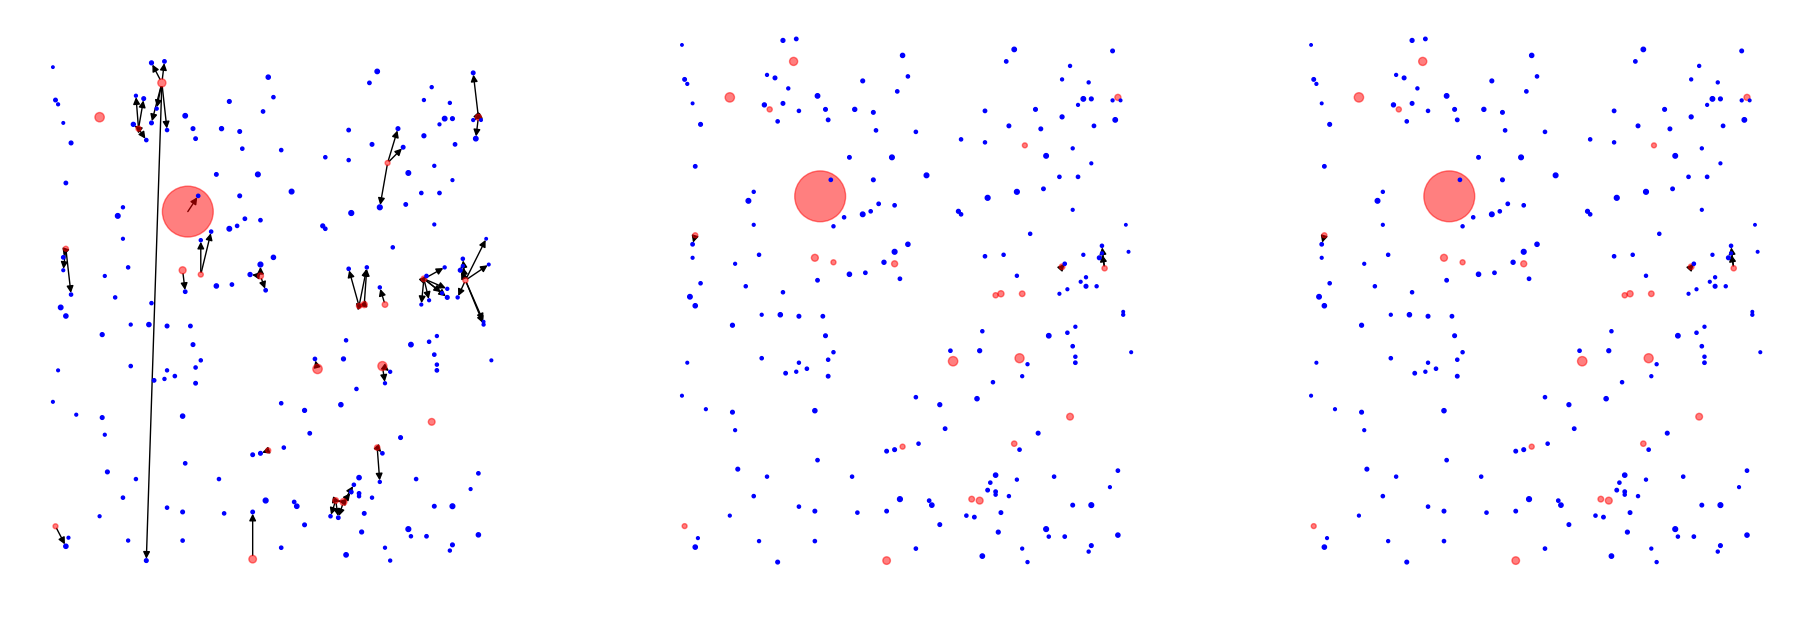

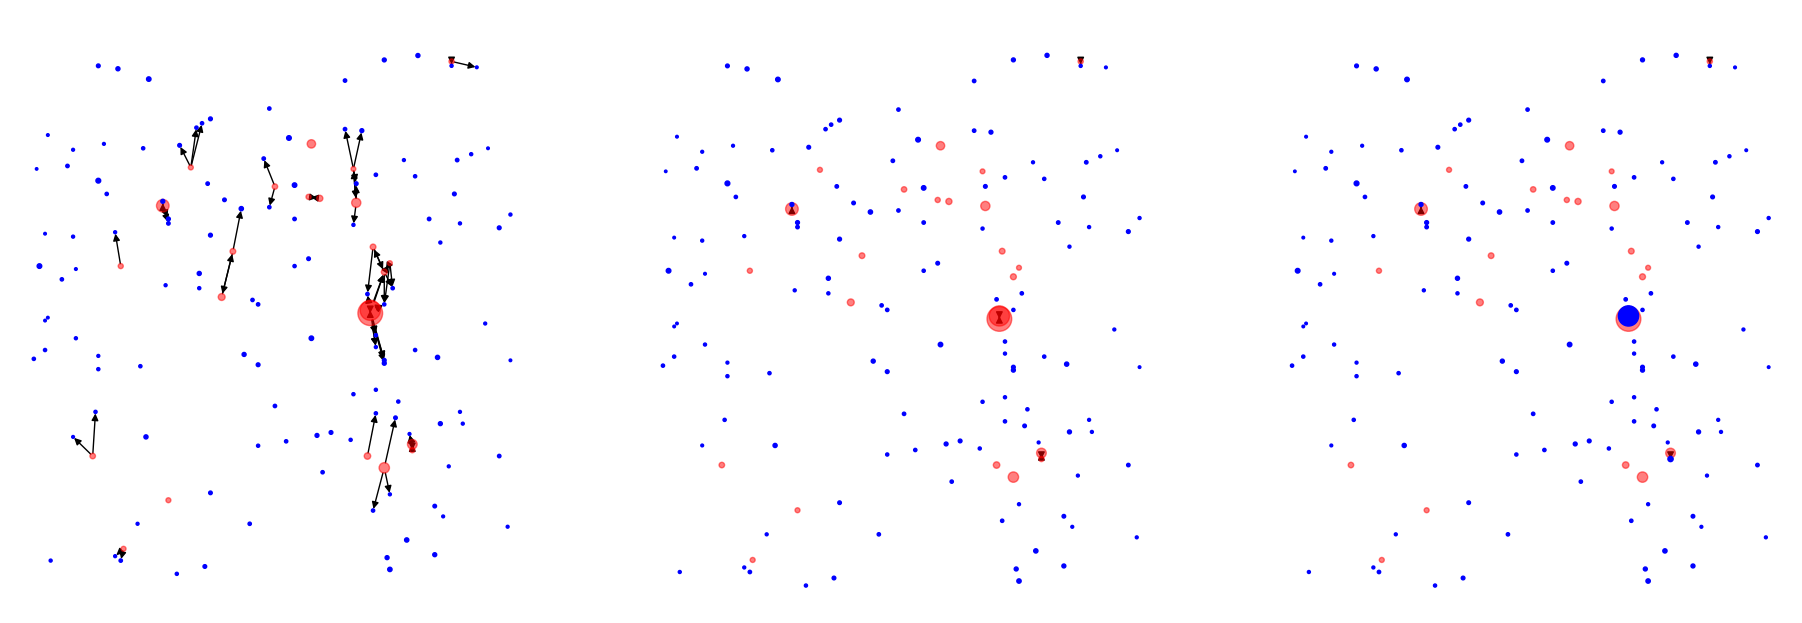

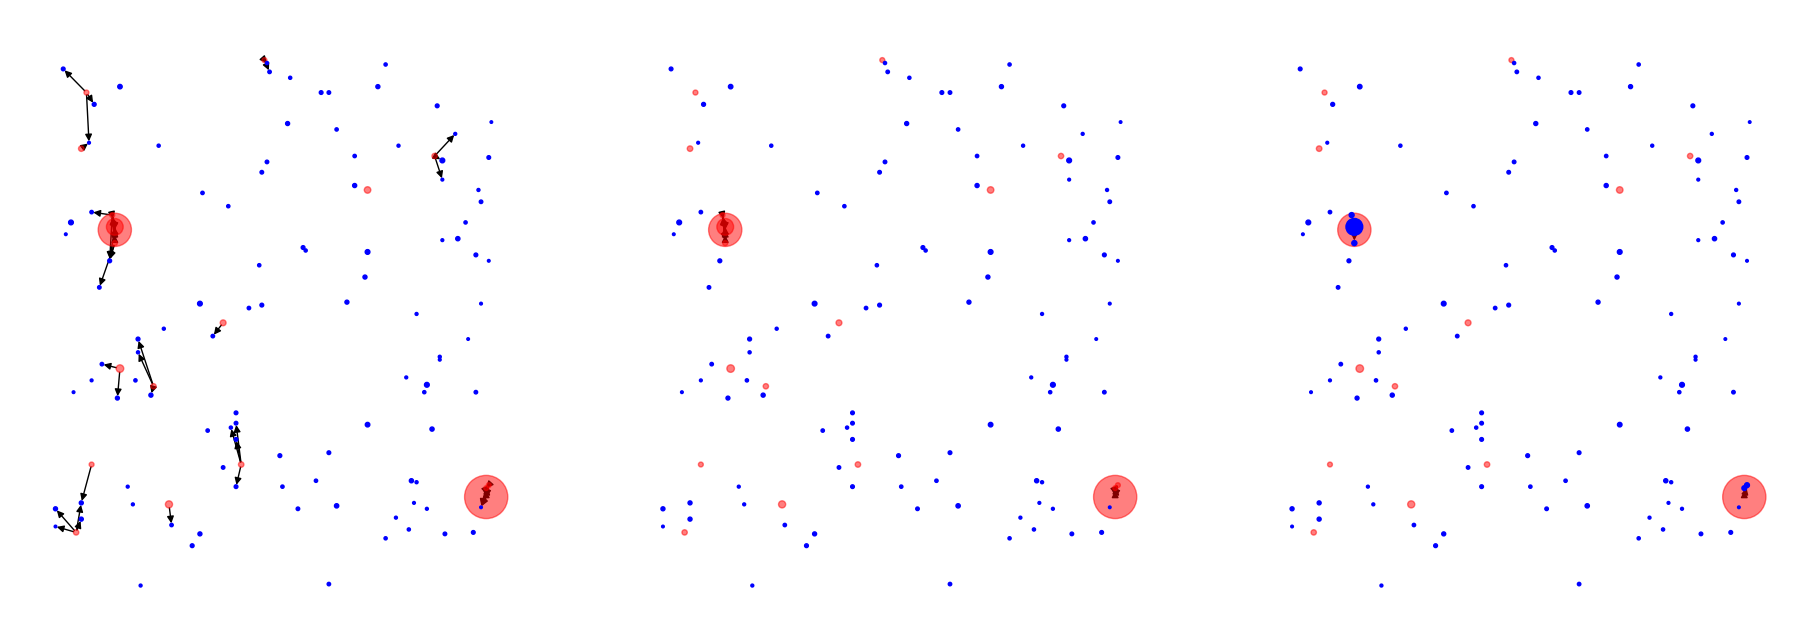

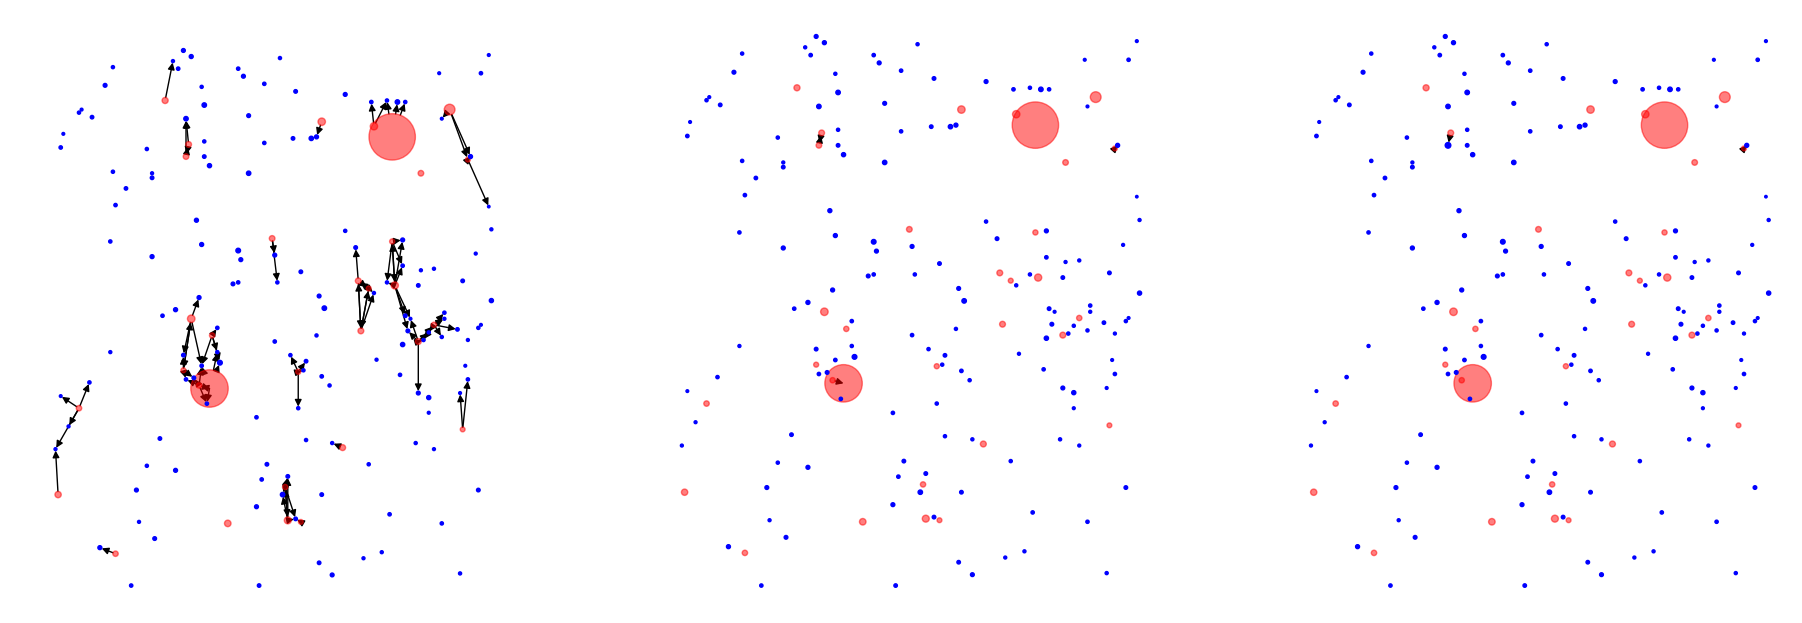

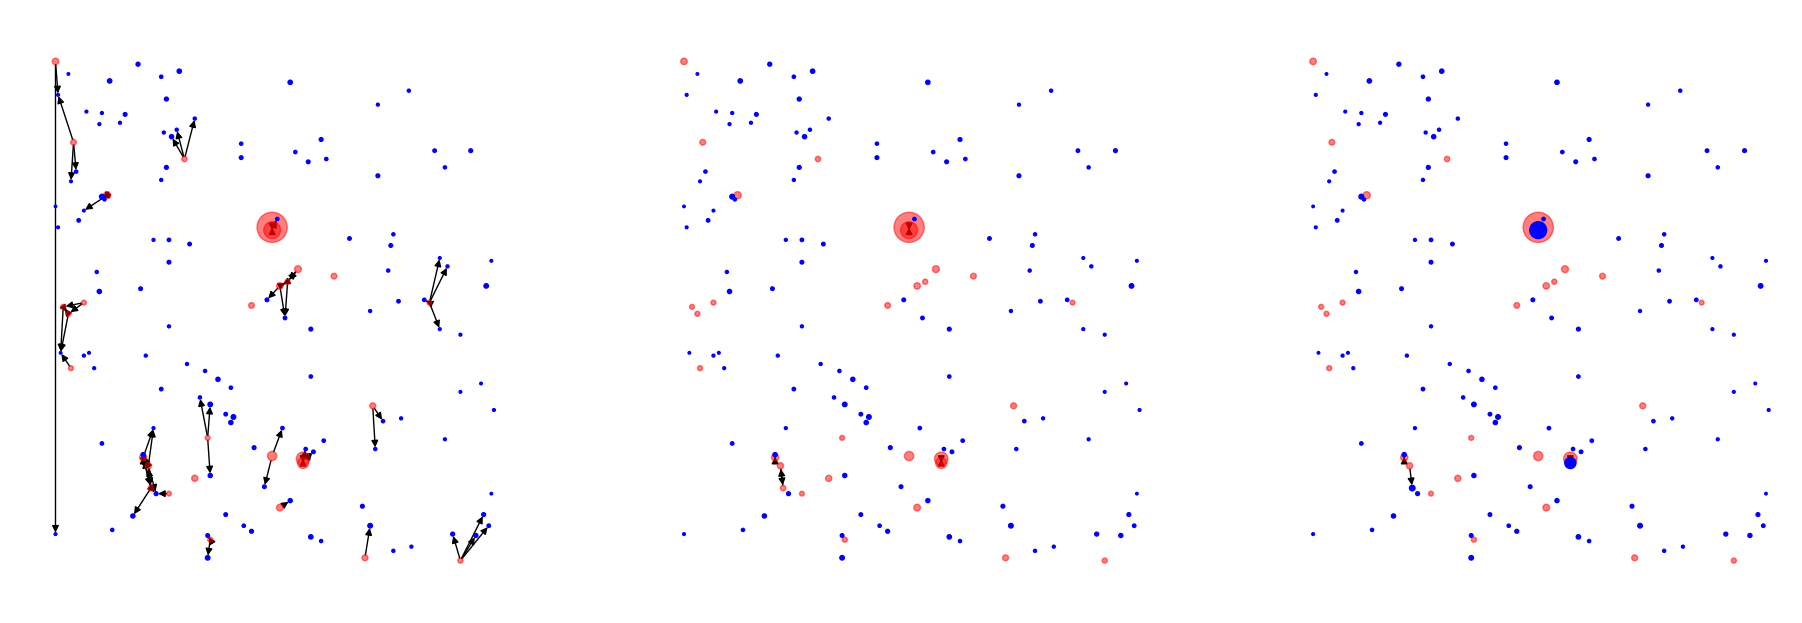

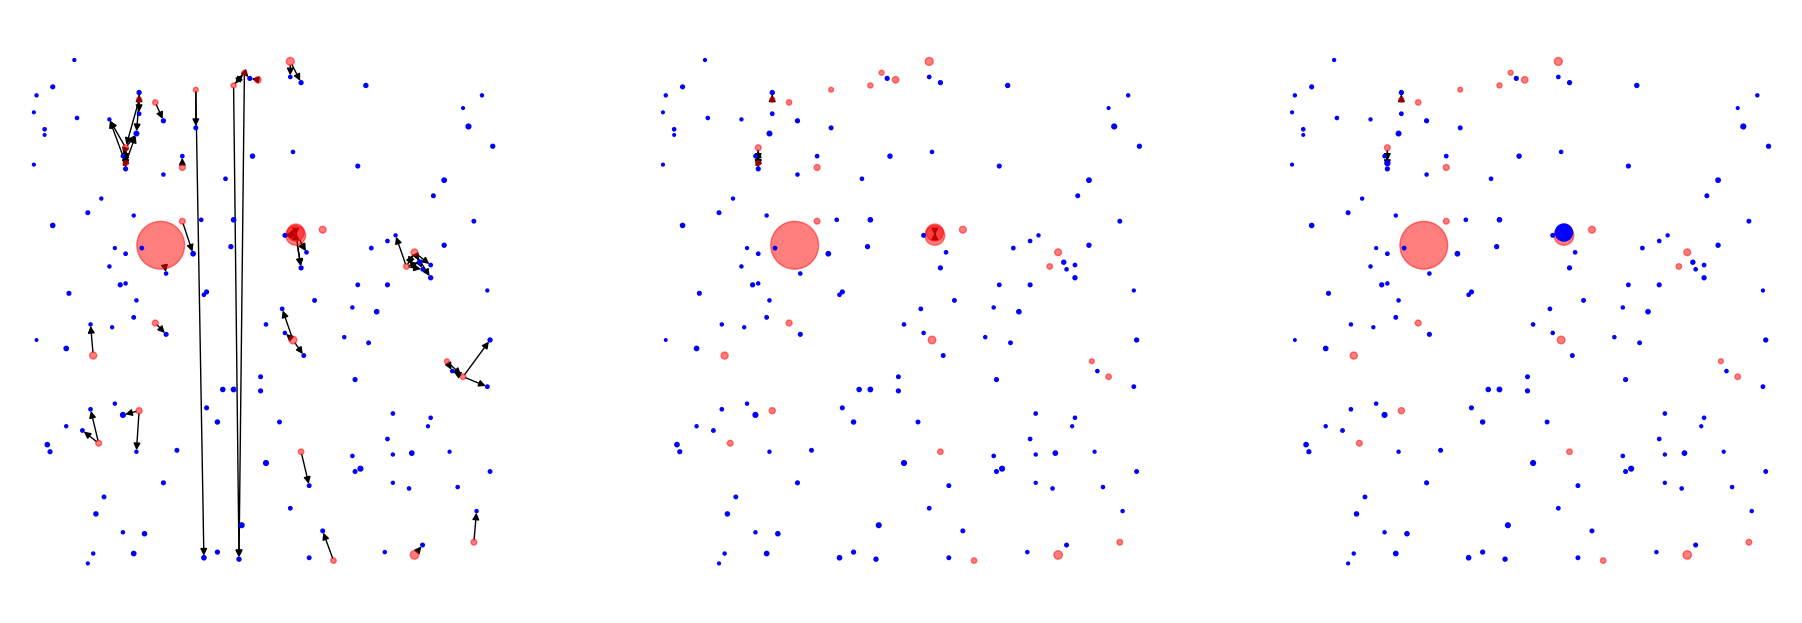

In [35]:
for N in range(20):

    G=nx.DiGraph()
    Gb=nx.DiGraph()
    Gf = nx.DiGraph()

    energies = [ ]
    for (i, ix,iy,iz, en) in EB[N][0]:
        G.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
        Gb.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
        Gf.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
        energies.append(en)

    seeds = [ ] 

    for (i, j, s) in EB[N][1]:
        G.add_edge(i,j, score=s)
        if (s>0.5):
            Gb.add_edge(i,j, score=s)
        if i==j:
            seeds.append(i)

    final_seed = []
    for (i, j) in EB[N][2]:
        Gf.add_edge(i,j)
        final_seed.append(i)

    pos = nx.get_node_attributes(G,'pos')
    is_seed = [ i in seeds for i in range(len(EB[N][0]))]
    is_seed_final = [ i in final_seed for i in range(len(EB[N][0]))]

    node_size = [ en*15  for en in energies]

    f, axs = plt.subplots(1,3, figsize=(23,8), dpi=100)
    nx.draw(G,pos, ax=axs[0], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
    nx.draw(Gb,pos, ax=axs[1], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
    nx.draw(Gf,pos, ax=axs[2], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed_final])

IndexError: list index out of range

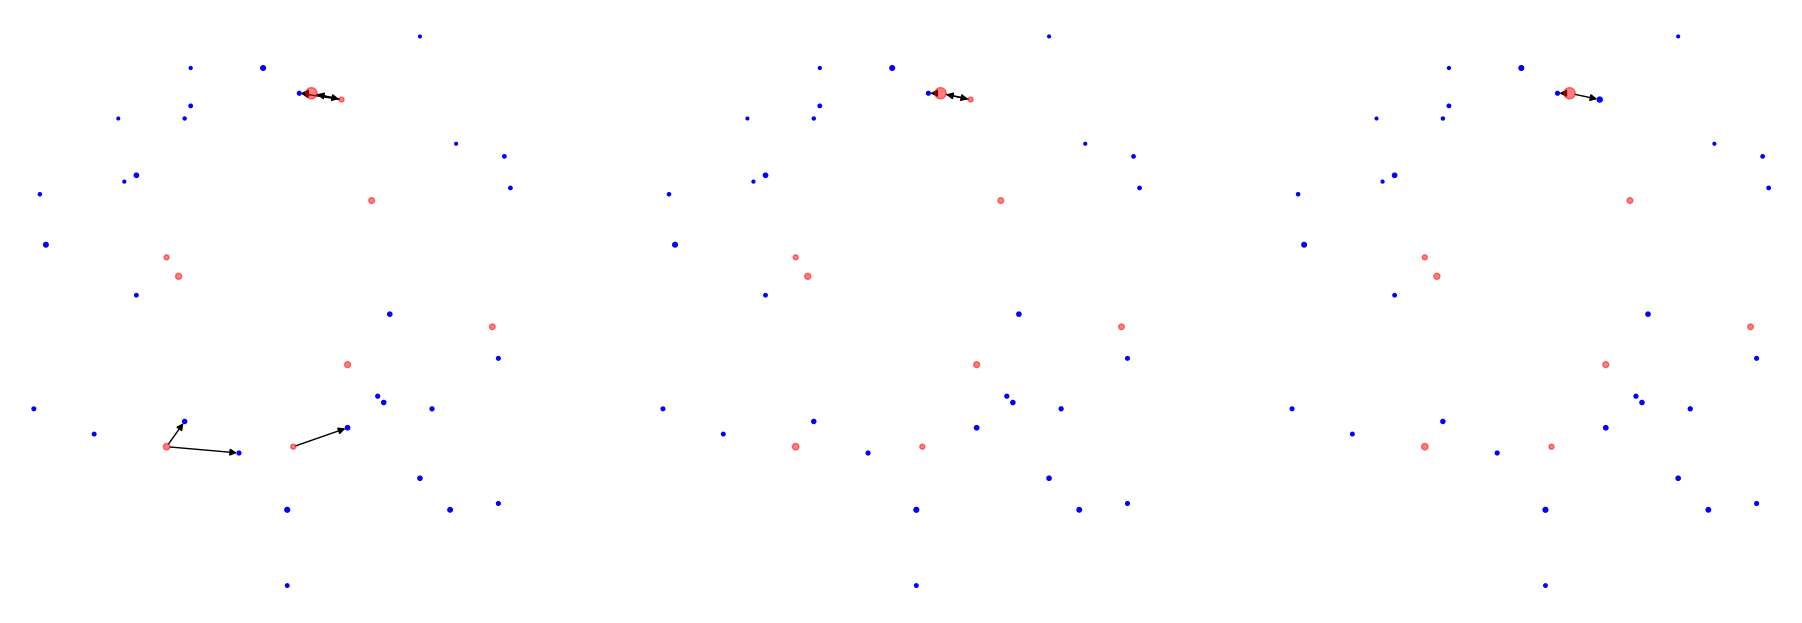

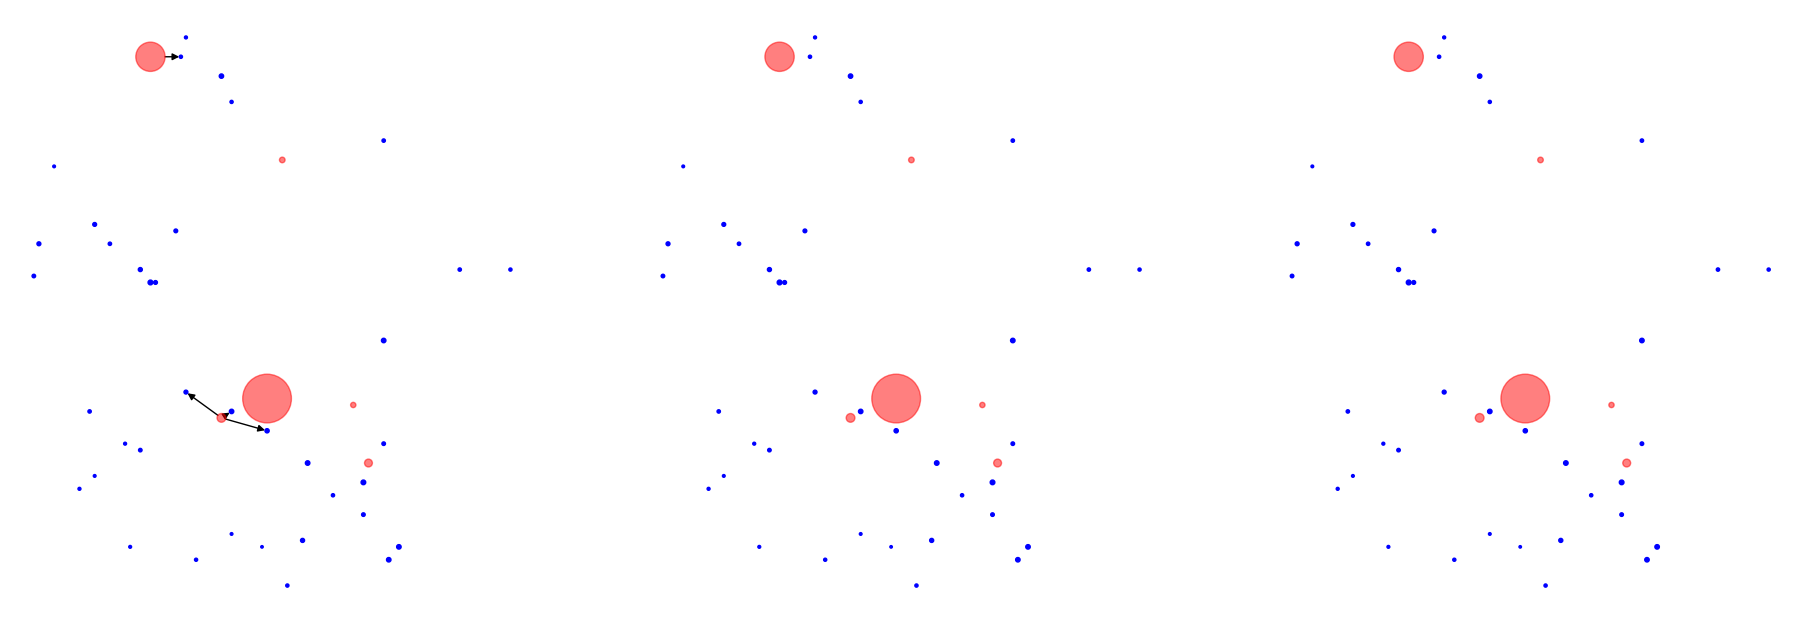

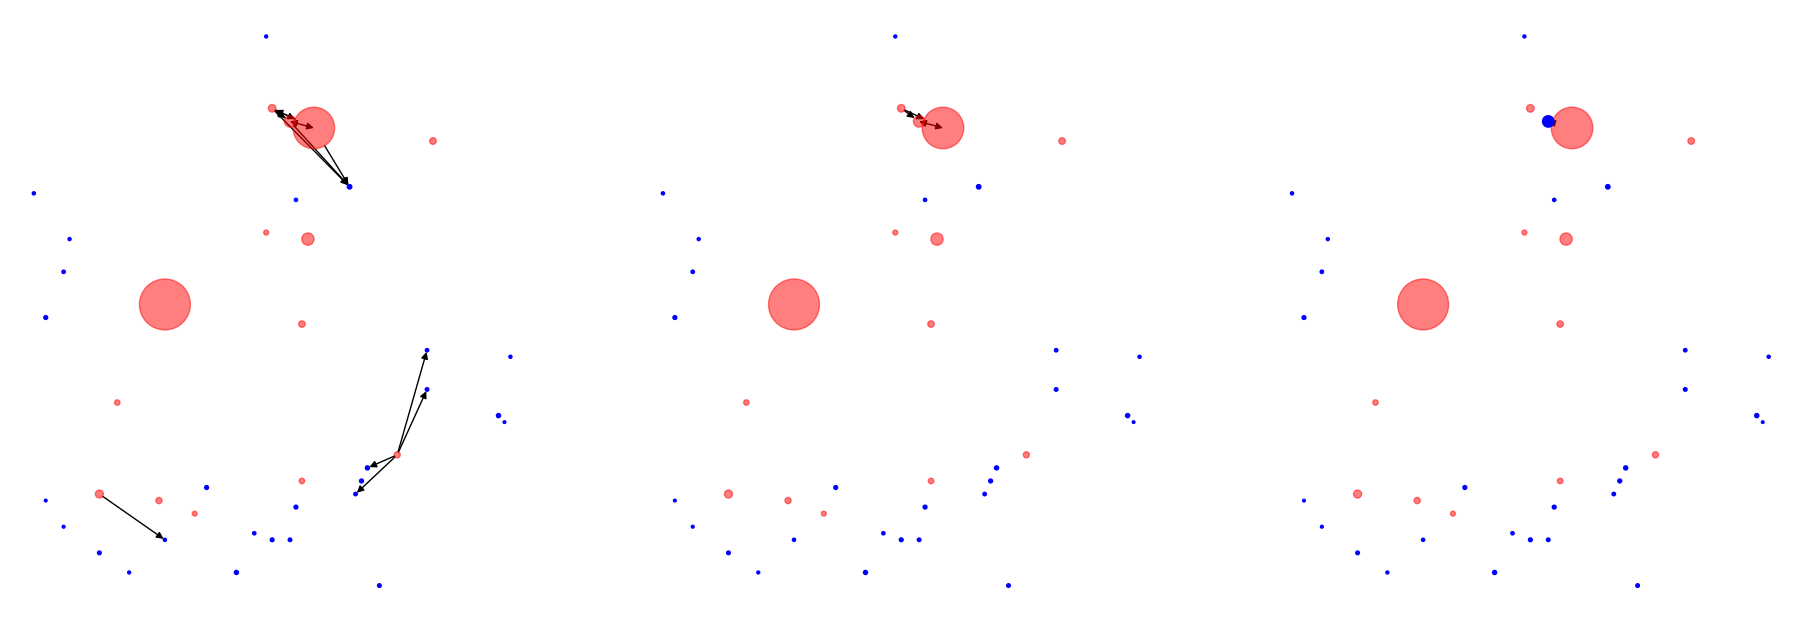

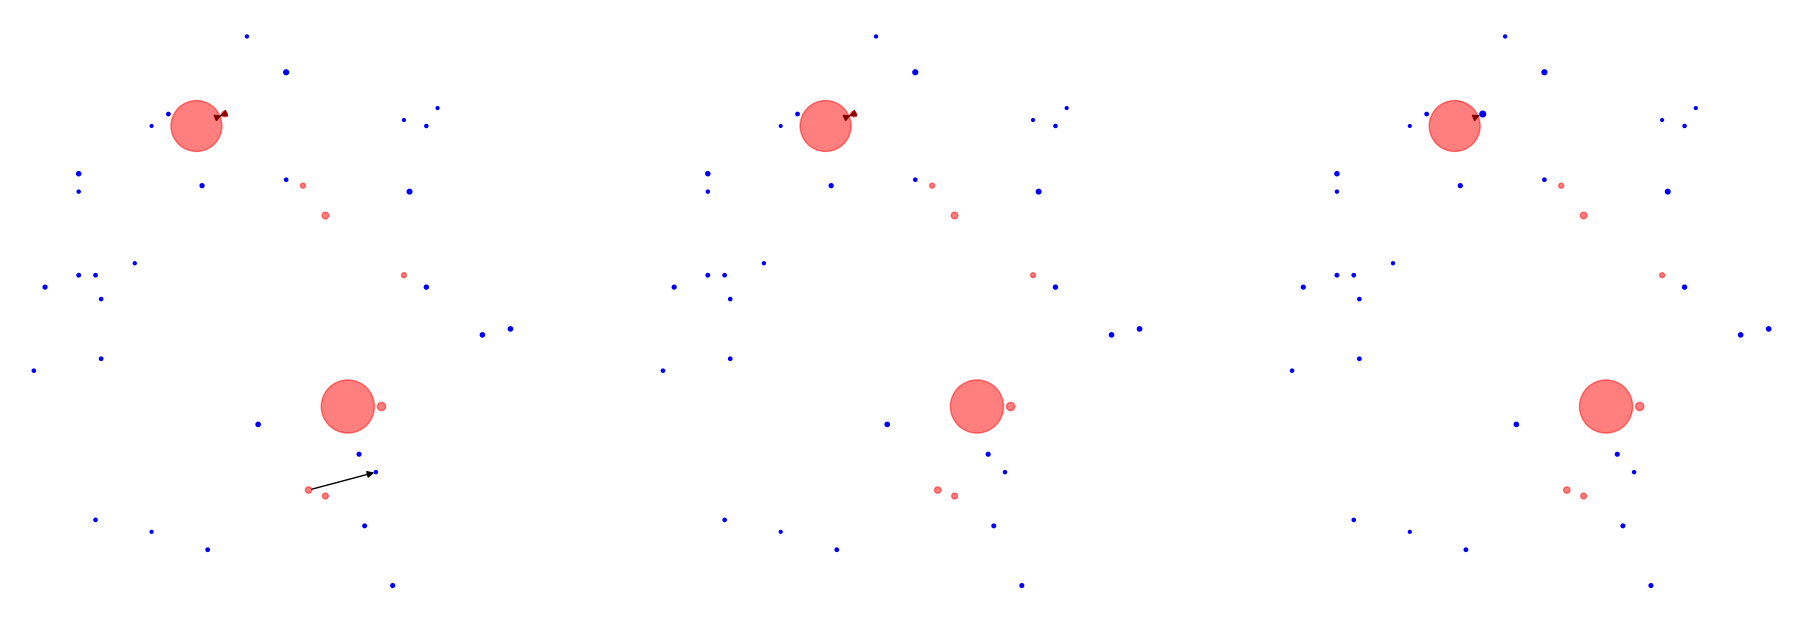

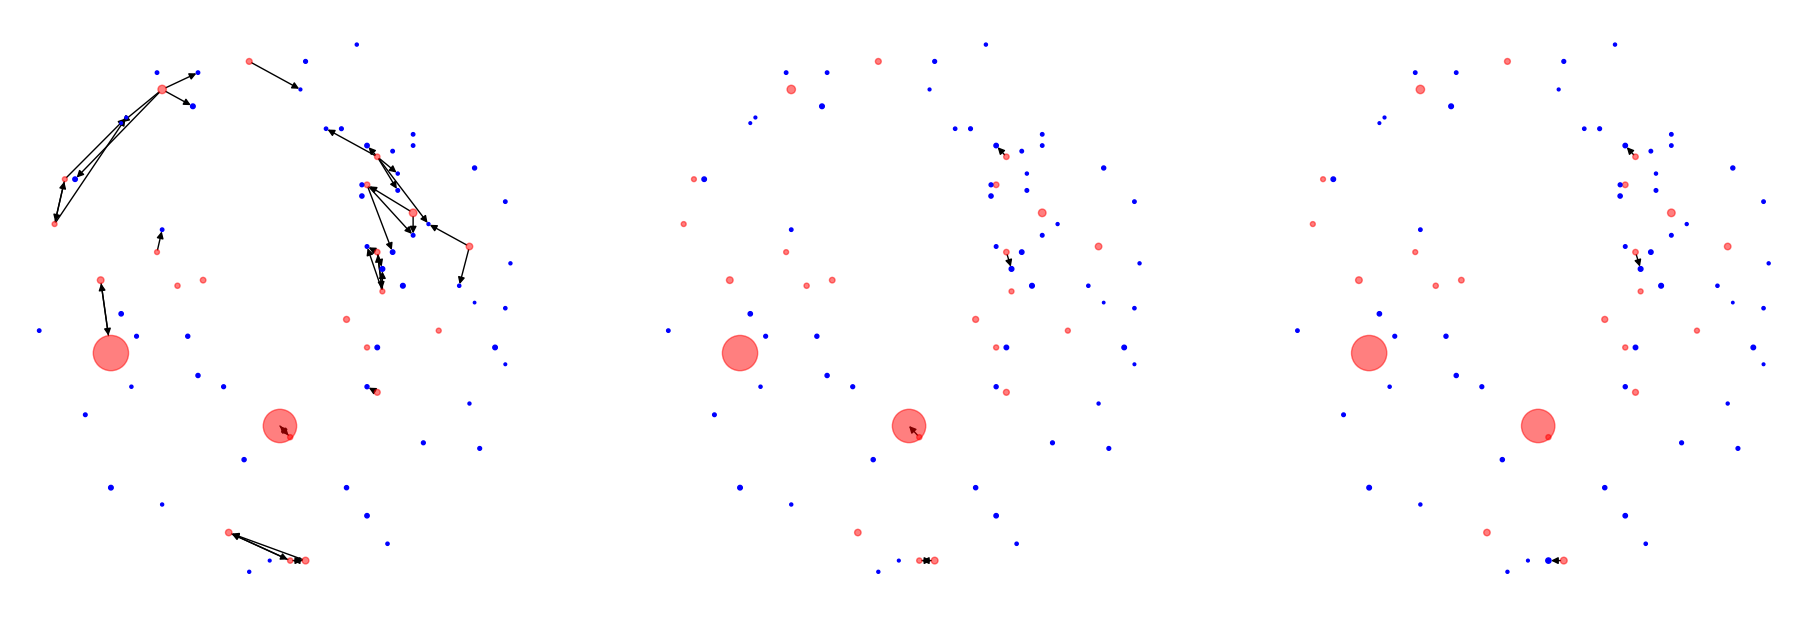

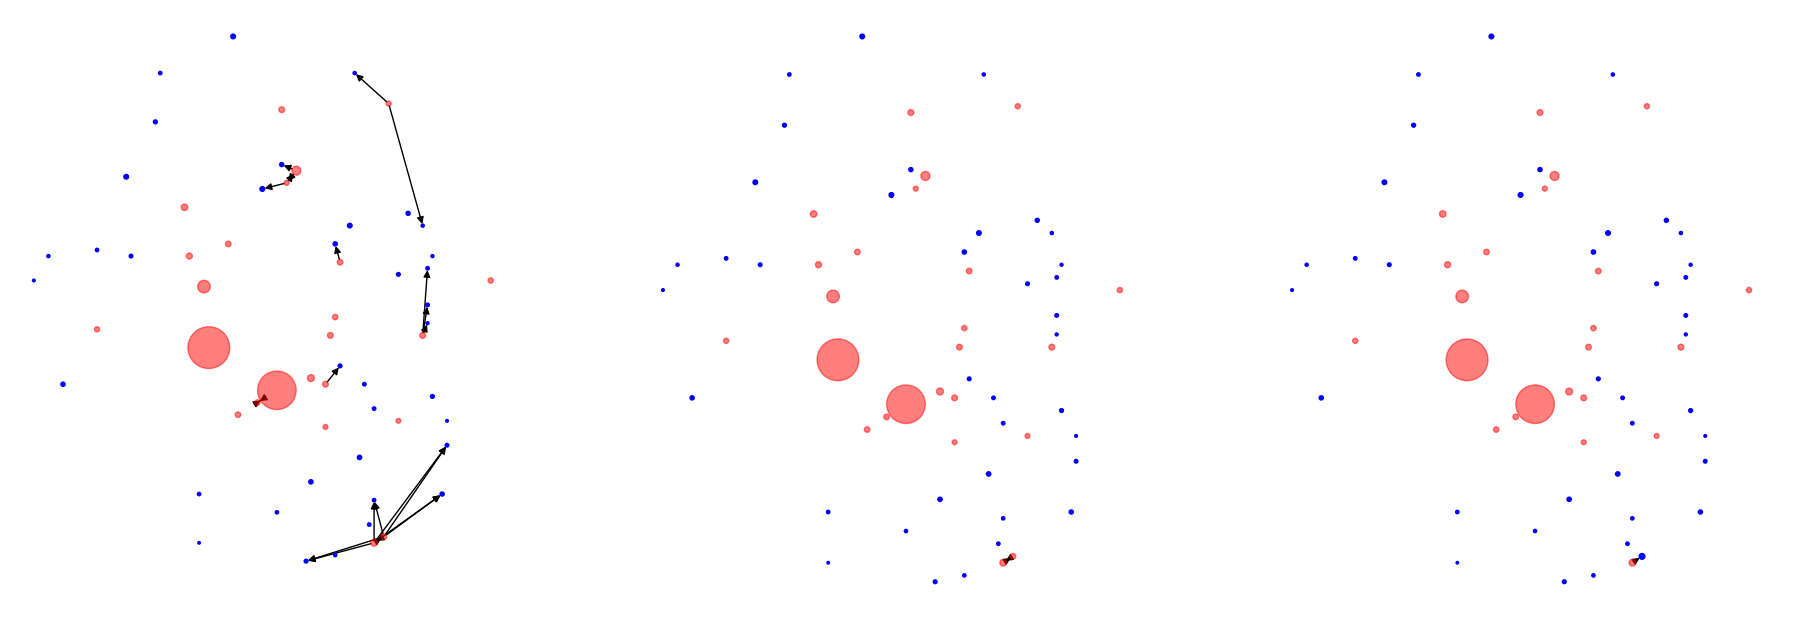

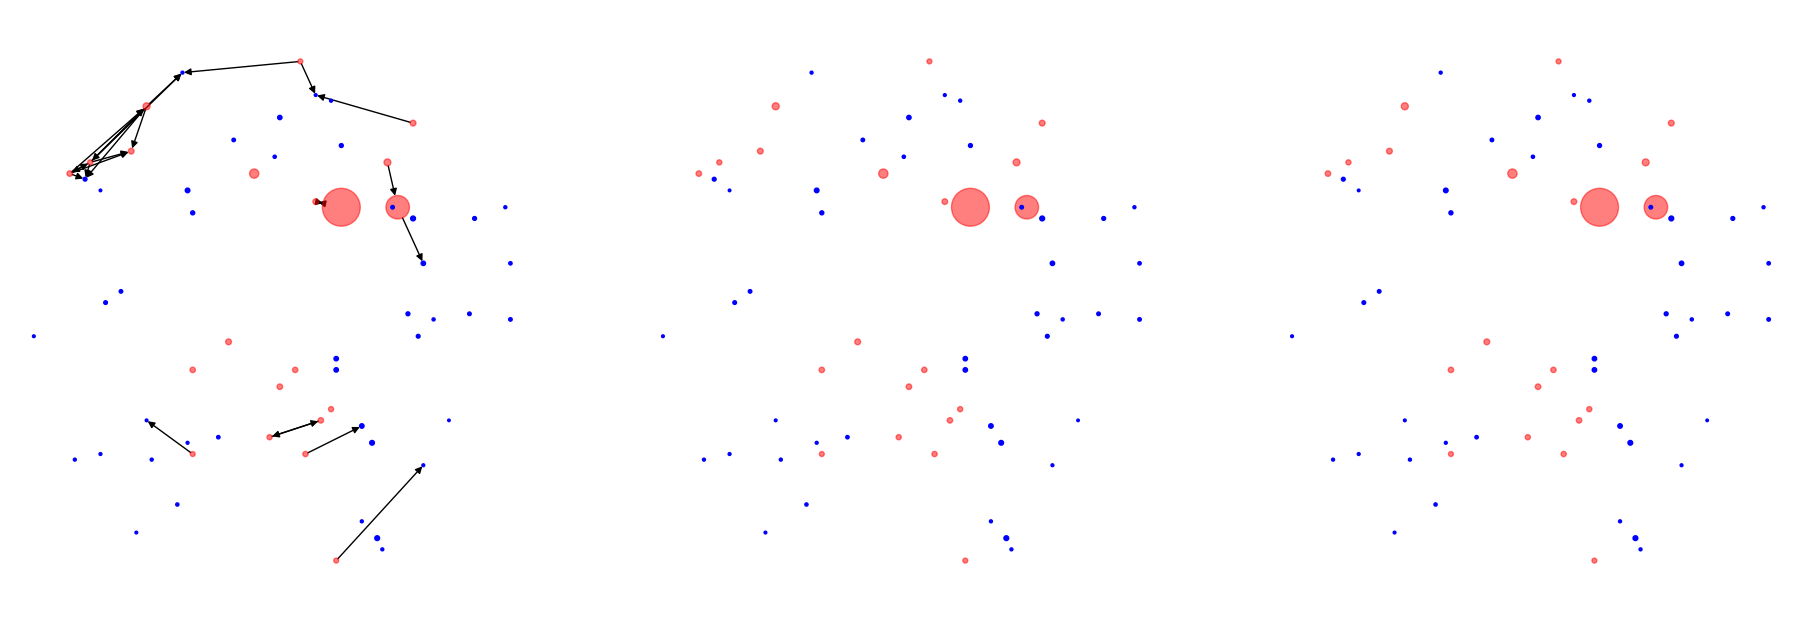

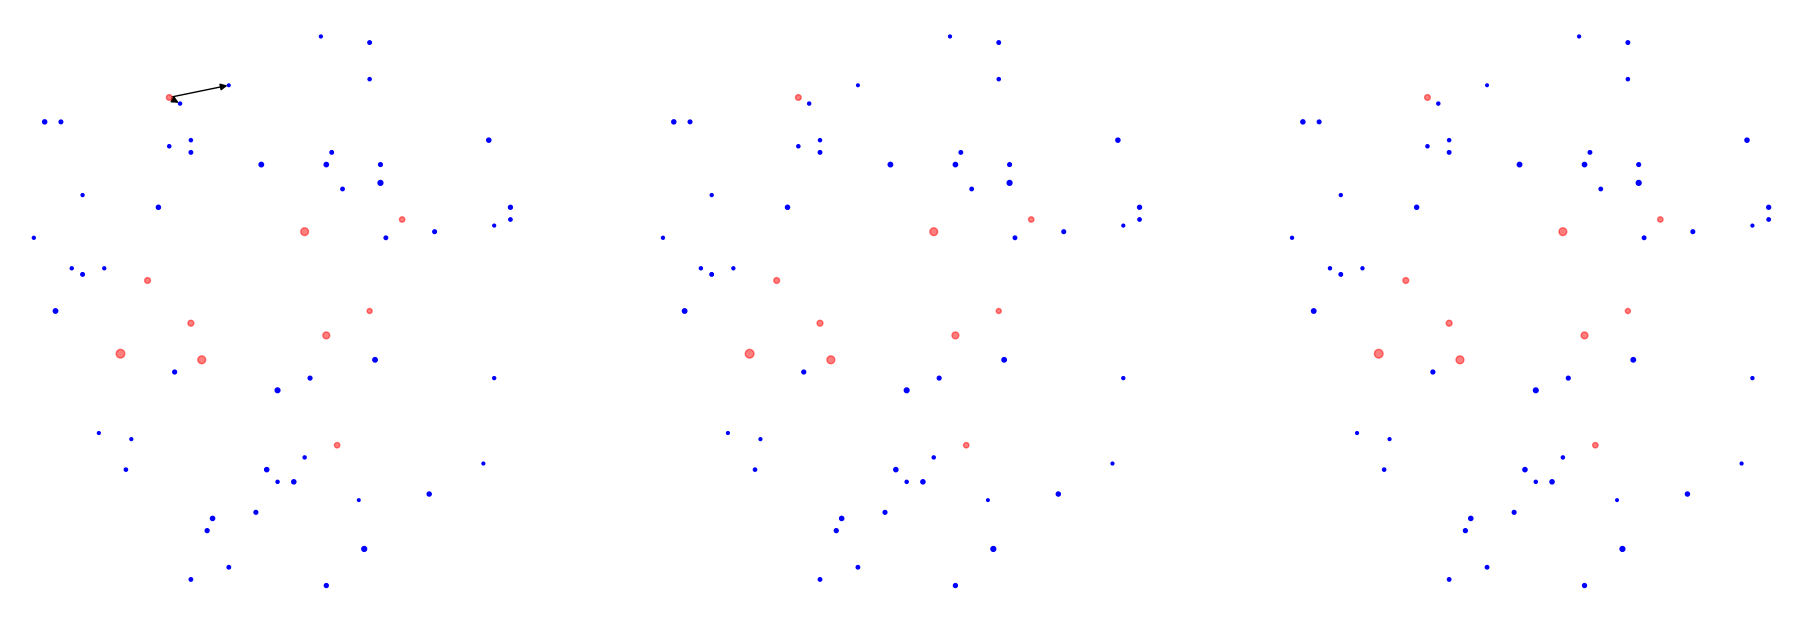

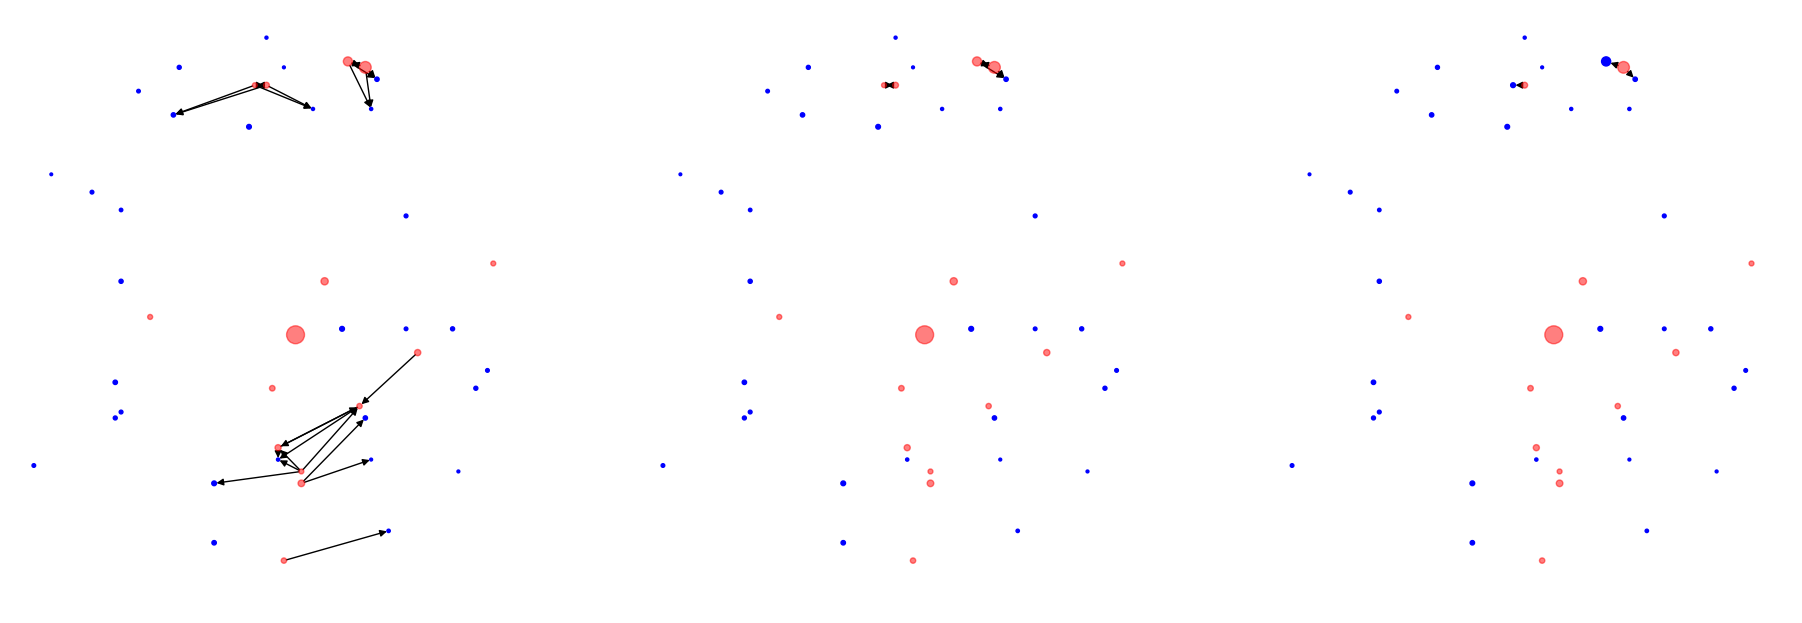

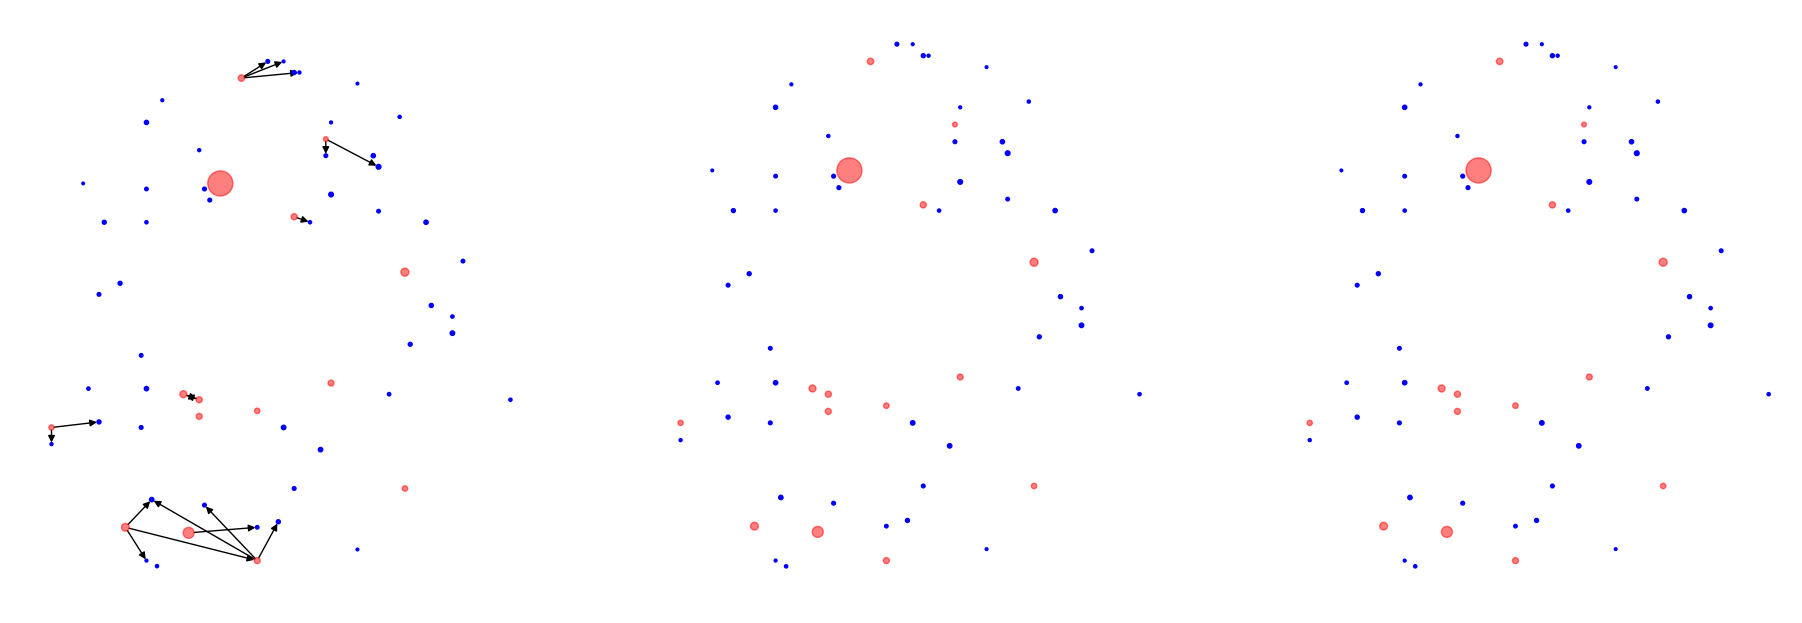

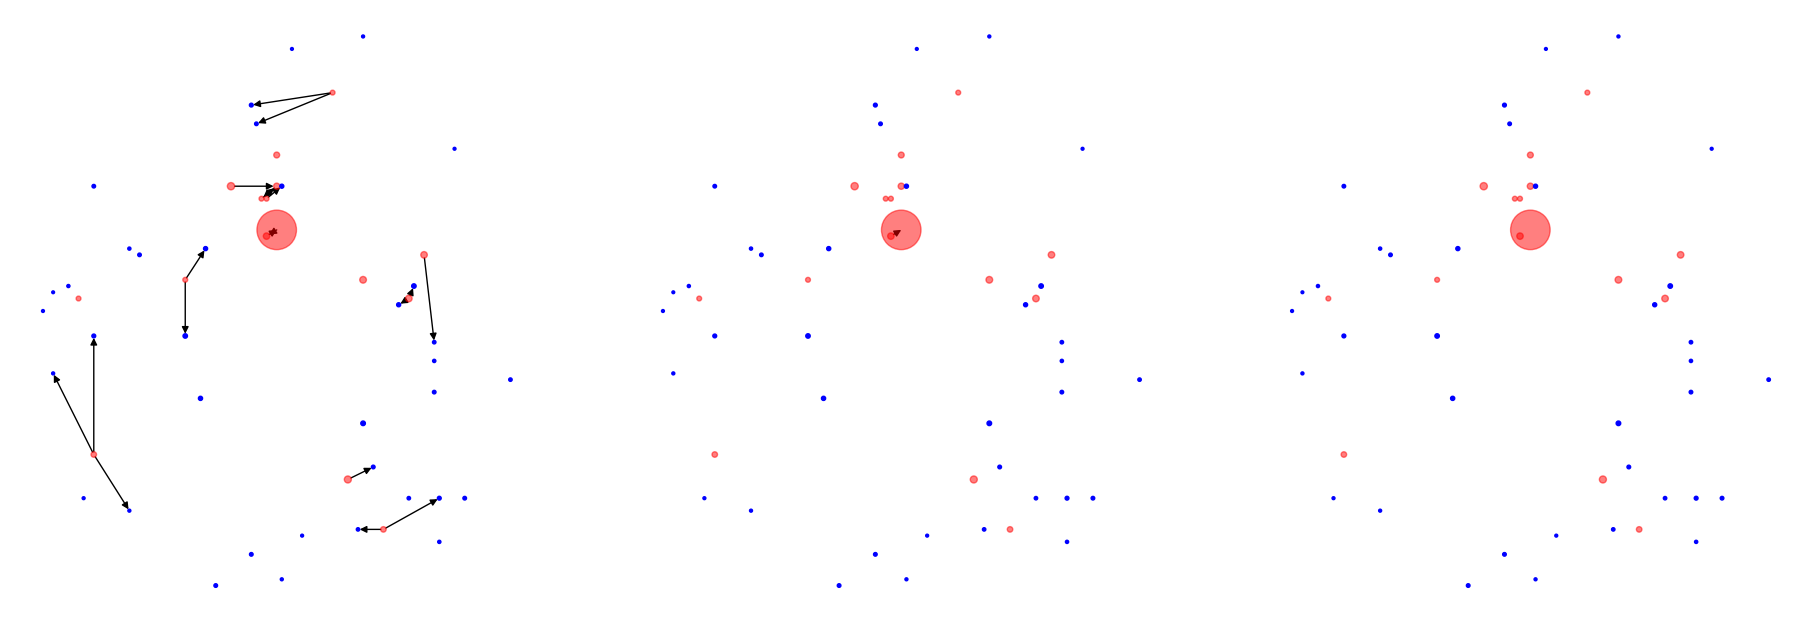

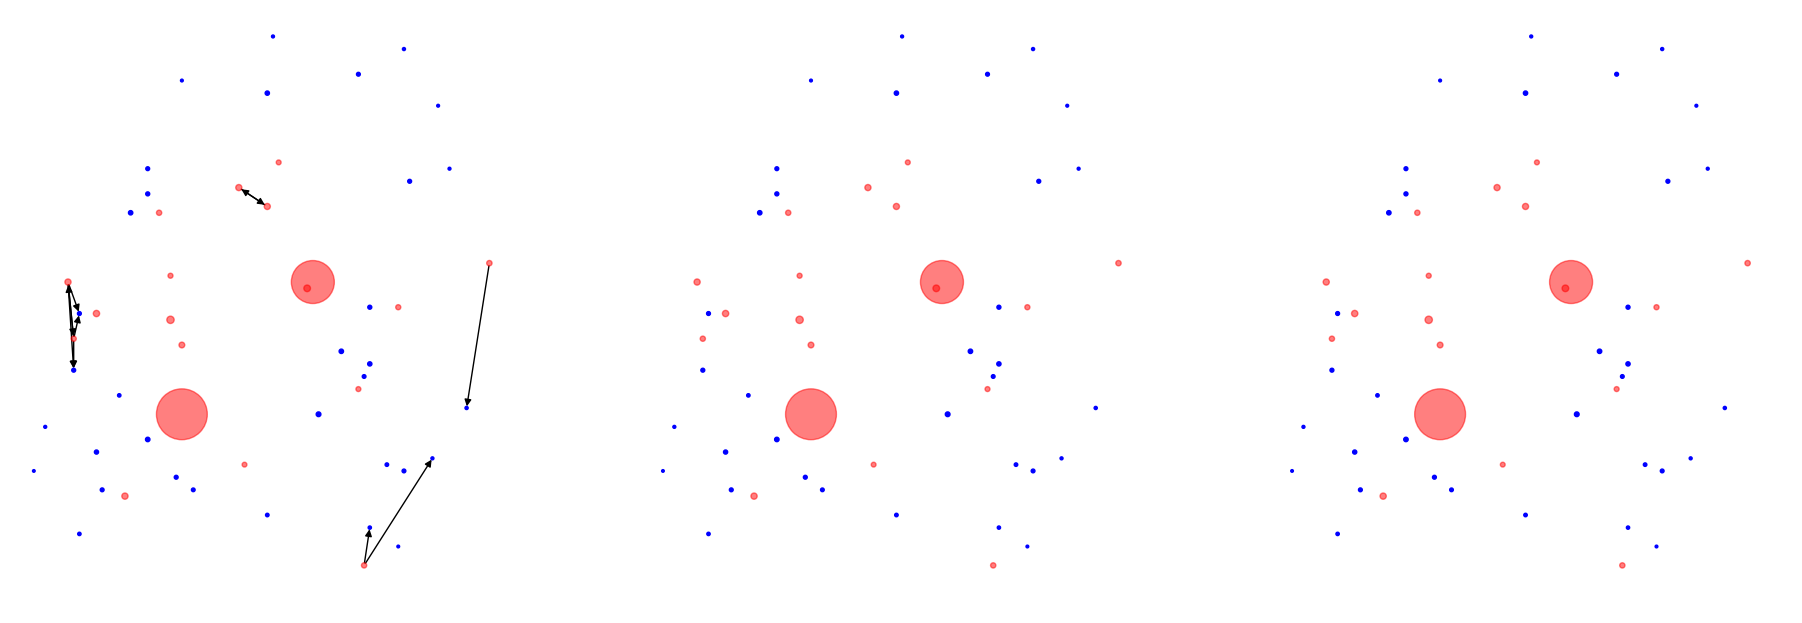

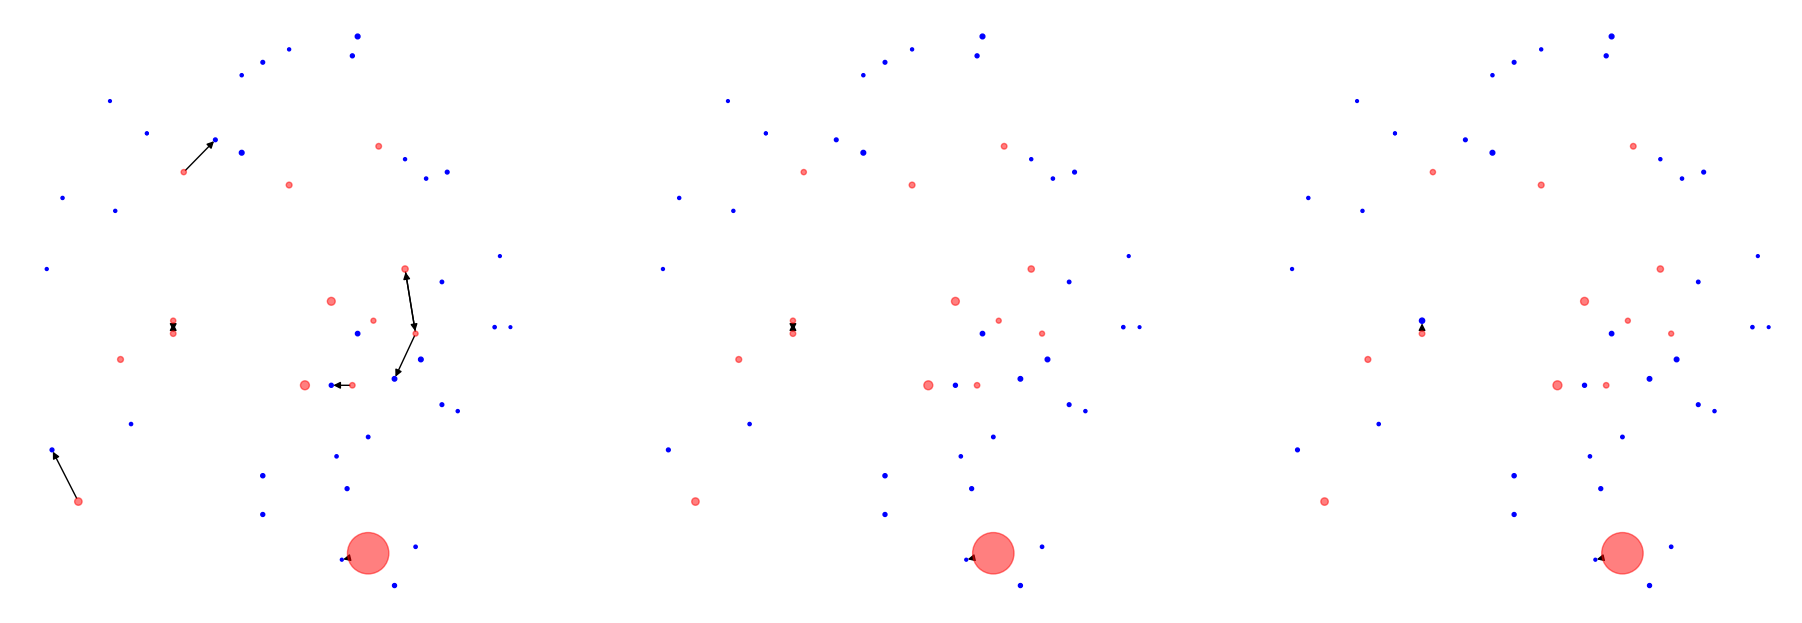

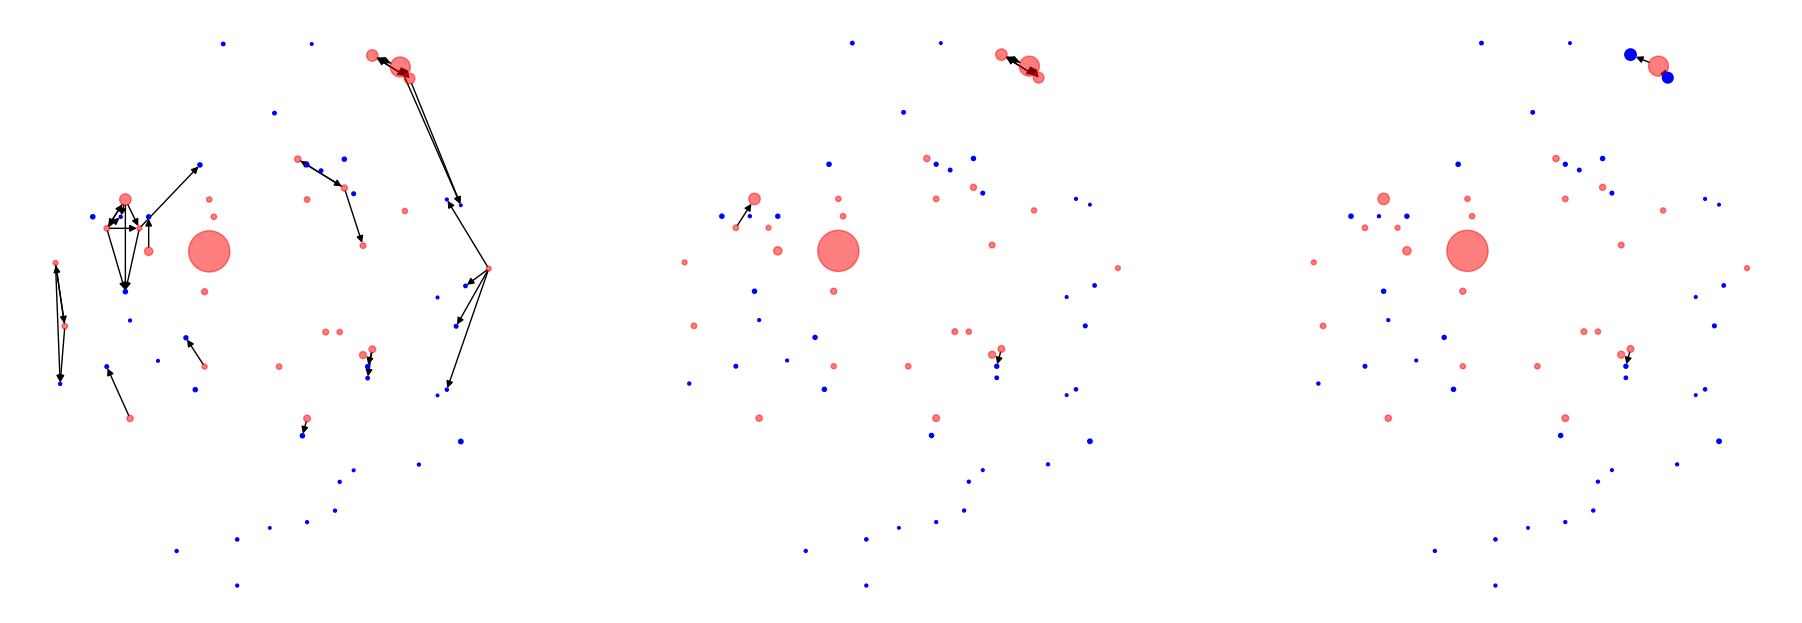

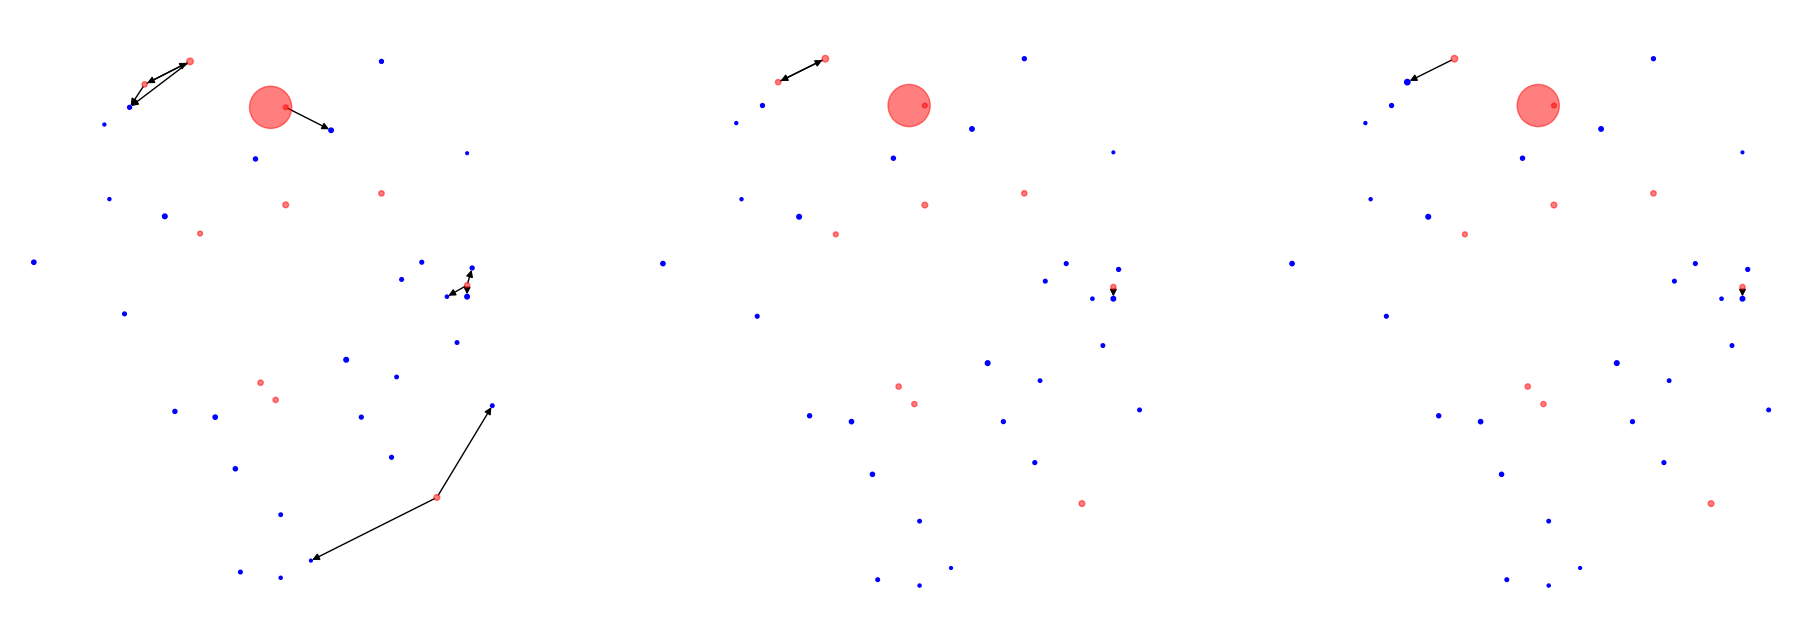

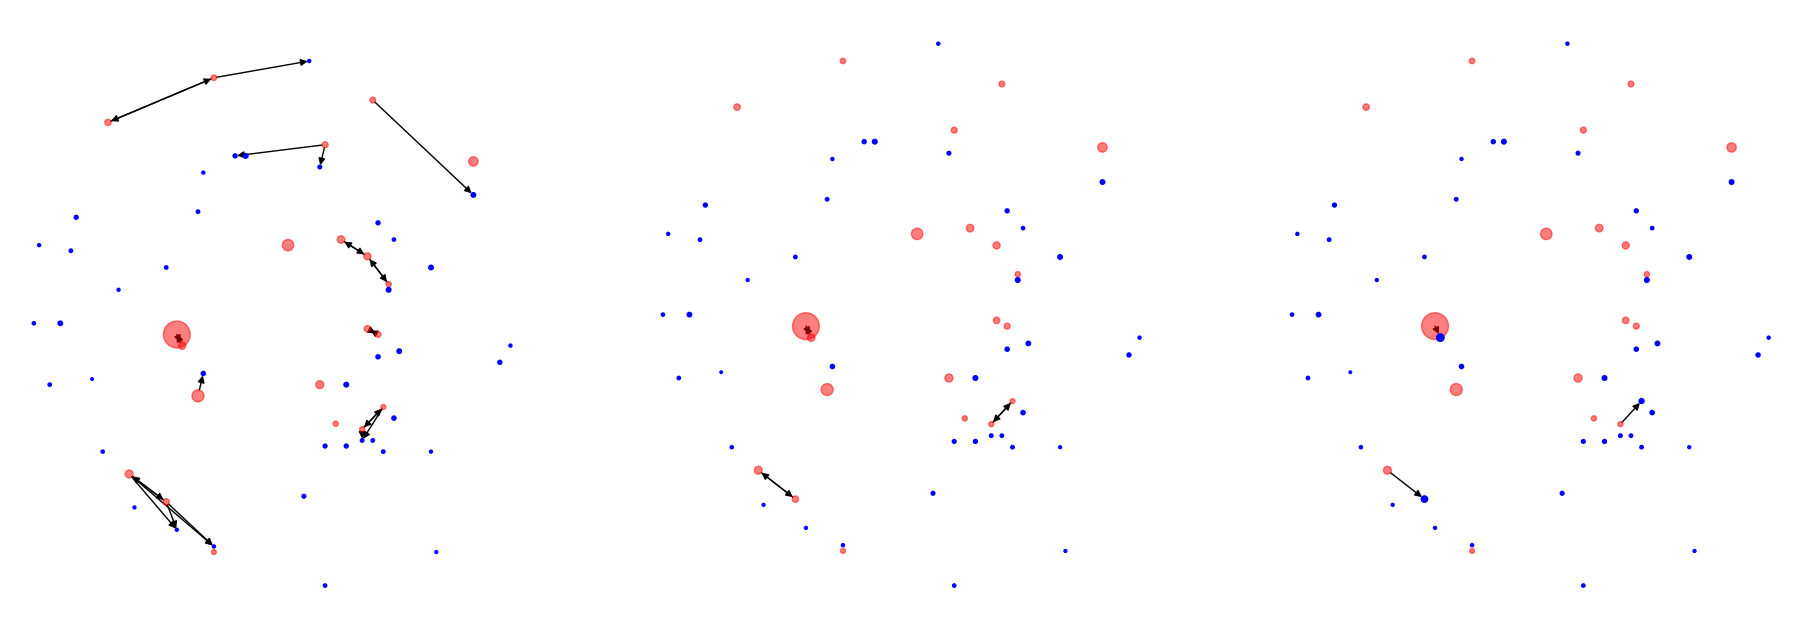

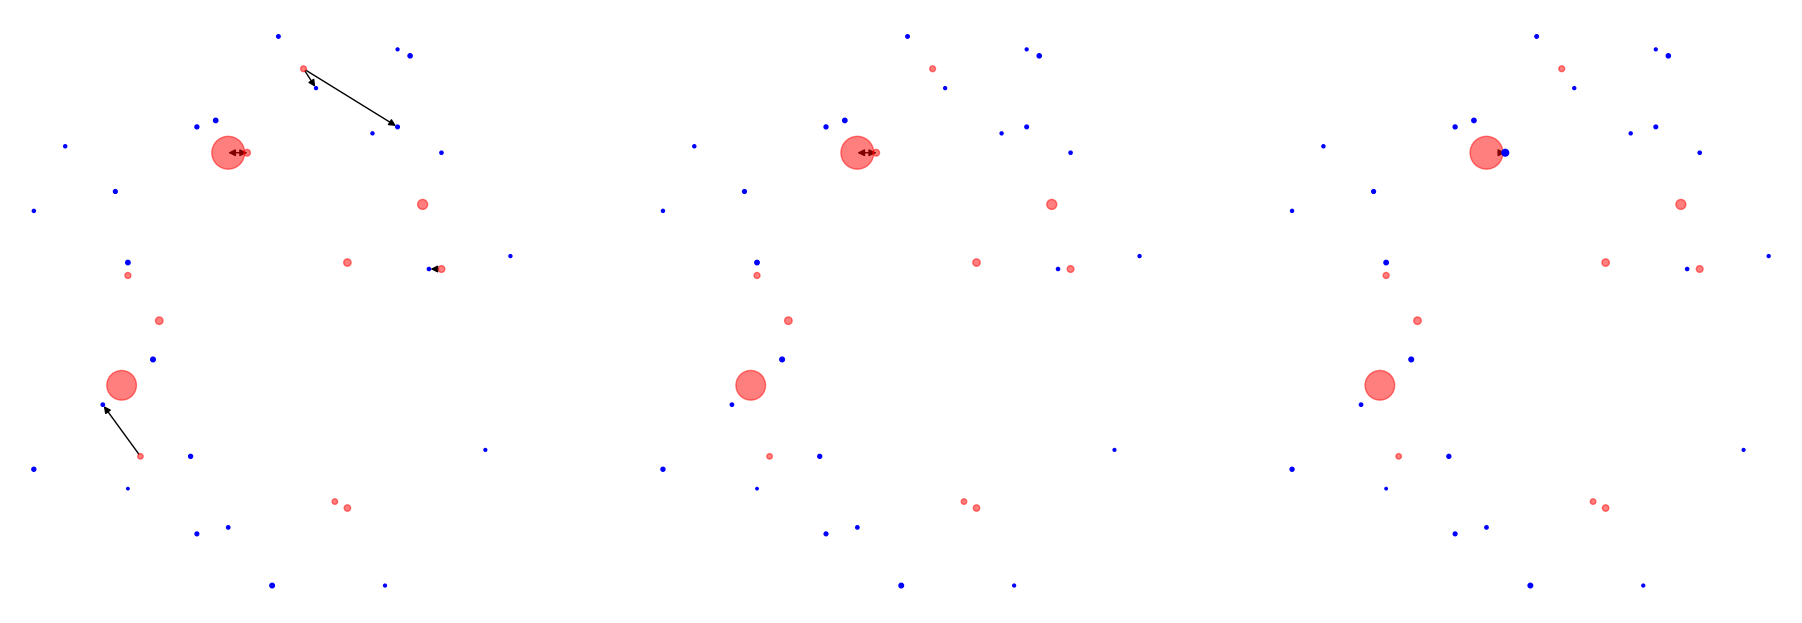

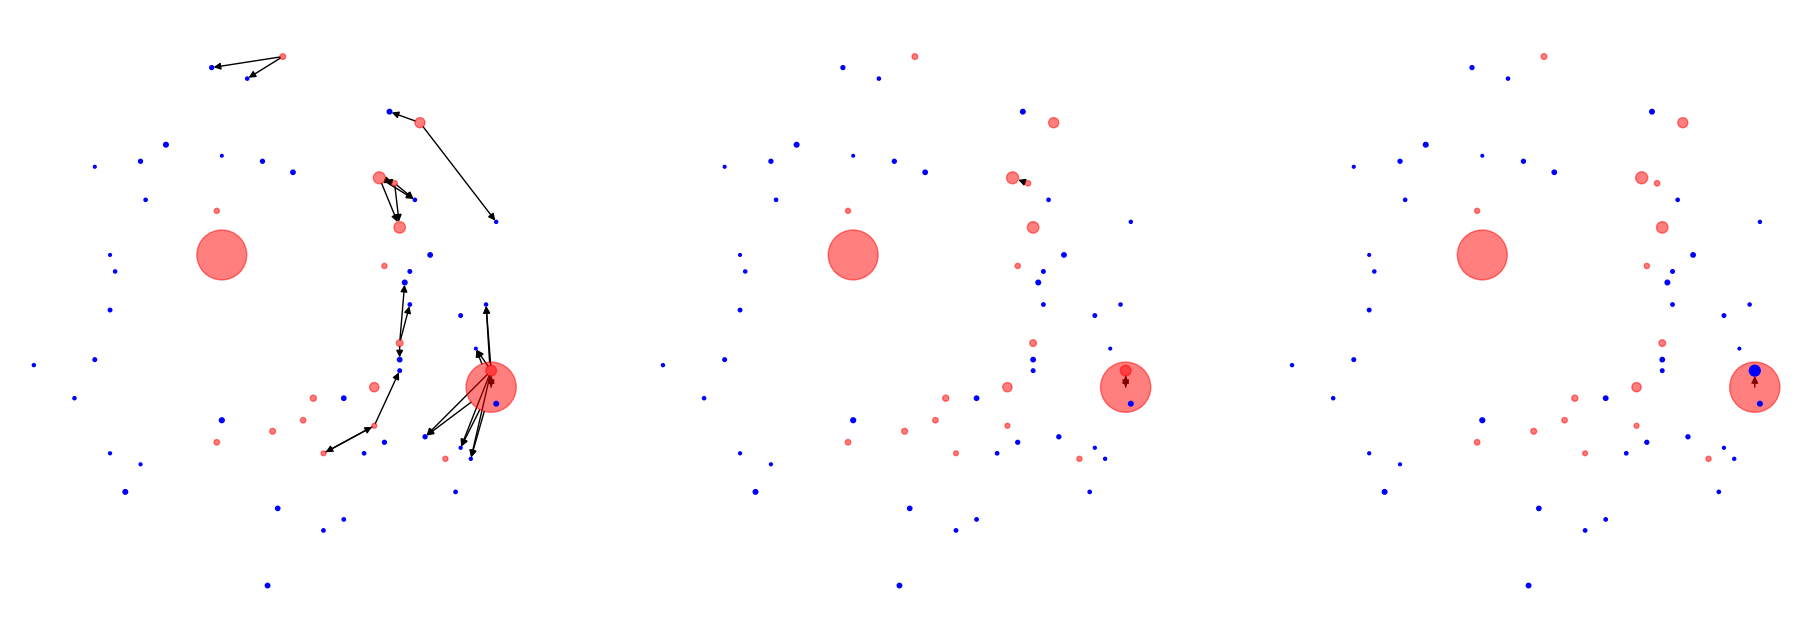

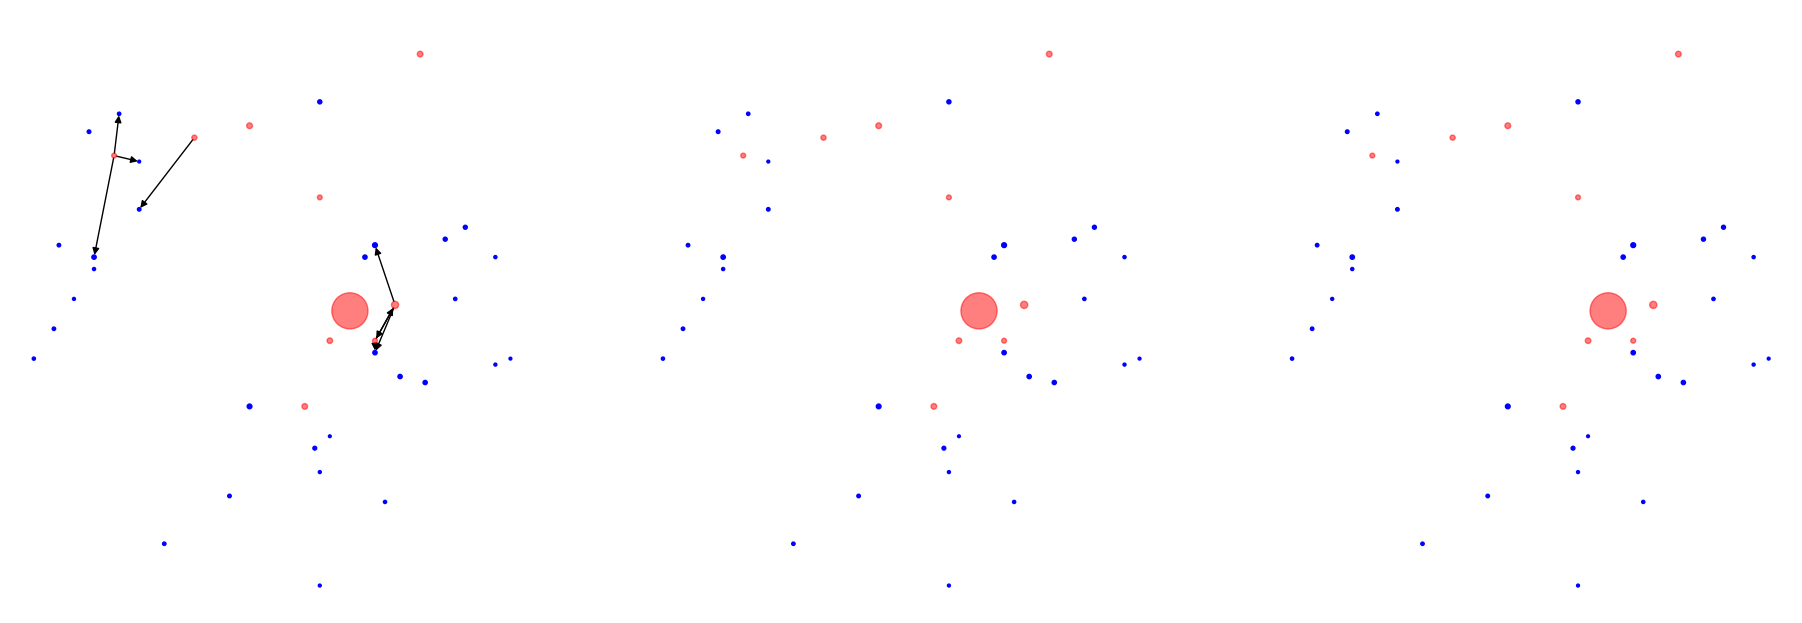

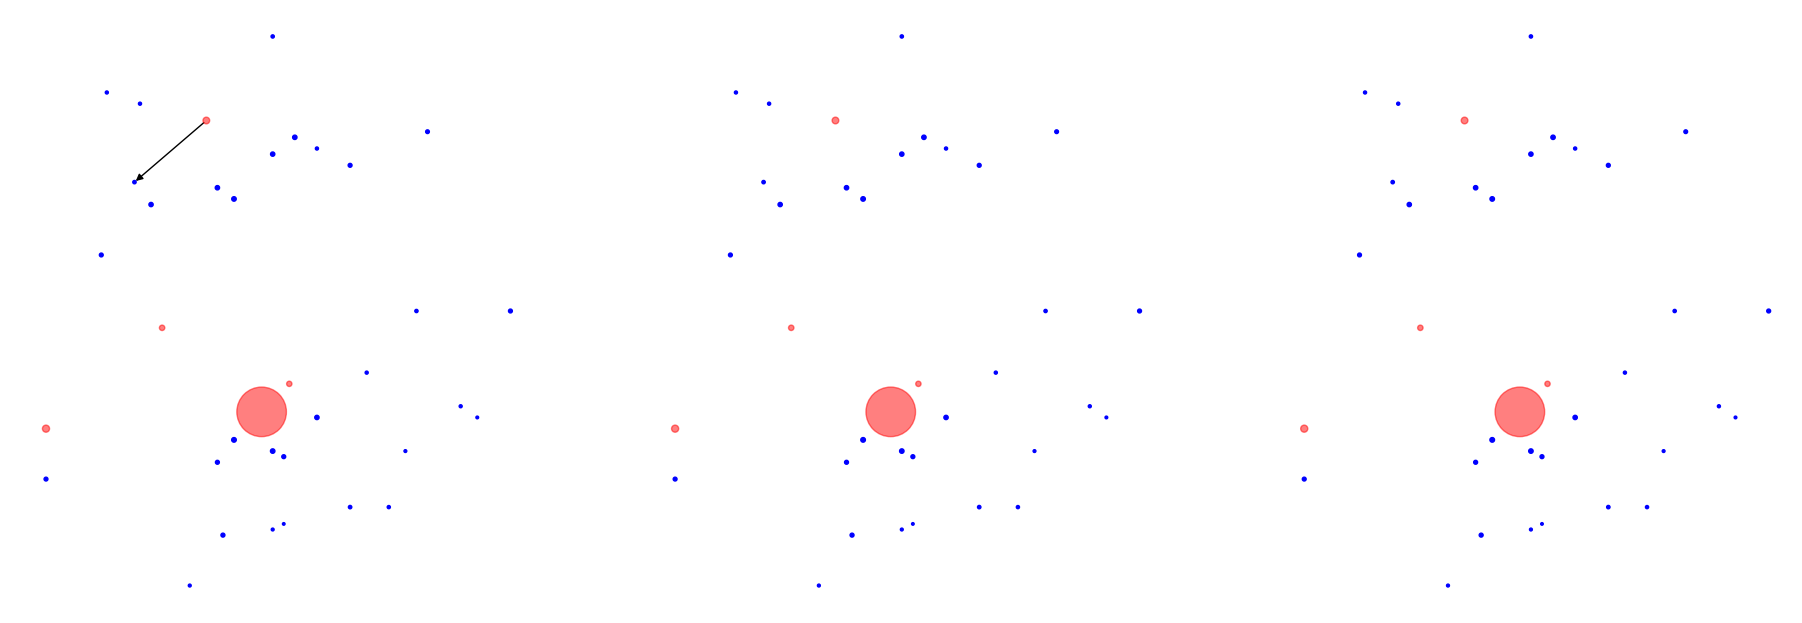

In [36]:
for N in range(20):
    for EE in [EE1, EE2]:

        G=nx.DiGraph()
        Gb=nx.DiGraph()
        Gf = nx.DiGraph()

        energies = [ ]
        for (i, ix,iy,iz, en) in EE[N][0]:
            G.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
            Gb.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
            Gf.add_node(i, pos=(ix,iy), x=ix, y=iy, en=en)
            energies.append(en)

        seeds = [ ] 

        for (i, j, s) in EE[N][1]:
            G.add_edge(i,j, score=s)
            if (s>0.5):
                Gb.add_edge(i,j, score=s)
            if i==j:
                seeds.append(i)

        final_seed = []
        for (i, j) in EE[N][2]:
            Gf.add_edge(i,j)
            final_seed.append(i)

        pos = nx.get_node_attributes(G,'pos')
        is_seed = [ i in seeds for i in range(len(EE[N][0]))]
        is_seed_final = [ i in final_seed for i in range(len(EE[N][0]))]

        node_size = [ en*15  for en in energies]

        f, axs = plt.subplots(1,3, figsize=(23,8), dpi=100)
        nx.draw(G,pos, ax=axs[0], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
        nx.draw(Gb,pos, ax=axs[1], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed])
        nx.draw(Gf,pos, ax=axs[2], node_size=node_size, node_color = [  "#ff000080" if i else "blue" for i in is_seed_final])

In [39]:
from pyvis.network import Network
from IPython.core.display import display, HTML

In [56]:
net = Network(directed=False, notebook=True, height="500px", width="500px", layout='fixed')
net.from_nx(G)
net.show('example.html')

In [51]:
net.get_node(0)

{'pos': (19, 87),
 'x': 19,
 'y': 87,
 'en': 31.6245,
 'size': 10,
 'id': 0,
 'label': 0,
 'shape': 'dot'}